In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

c:\Users\david\anaconda3\envs\Dsci\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

In [3]:
os.chdir('data/AB_Ptax')

In [4]:
def df_from_excelFiles_R(file_name):
    file = pd.ExcelFile(file_name)
    if len(file_name) <= 24:
        sheetname = 'MR(1)-Residential' 
        return file.parse(sheetname, header=1,skiprows=[2])
    elif file_name[-1] == 's' and file_name[8] == 'R':
        sheetname = 'MR Residential or Farmland'
        return file.parse(sheetname, header=1,skiprows=[2])
    elif file_name[8] == 'R':
        sheetname = 'Schedule MR'
        return file.parse(sheetname, header=1,skiprows=[2])
    else:
        return
    
def df_from_excelFiles_NR(file_name):
    file = pd.ExcelFile(file_name)
    if len(file_name) <= 24:
        sheetname = 'MR(2)-Non-Residential' 
        return file.parse(sheetname, header=1,skiprows=[2])
    elif file_name[-1] == 's' and file_name[8] == 'N':
        sheetname = 'MR Non-Residential'
        return file.parse(sheetname, header=1,skiprows=[2])
    elif file_name[8] == 'N':
        sheetname = 'Schedule MR'
        return file.parse(sheetname, header=1,skiprows=[2])
    else:
        return

In [5]:
def replace_column(df, Year,replace_data,with_data):
    count = 0
    while count < len(replace_data):
        print(replace_data[count])
        print(with_data[count])
        df.loc[df['Year'] == Year, replace_data[count]] = df.loc[df['Year'] == Year, with_data[count]]
        count += 1

In [6]:
files = os.listdir()

In [7]:
excel_files = [file for file in files if 'xls' in file]

In [8]:
ab_ptax21_03 = pd.concat([df_from_excelFiles_R(xl) for xl in excel_files])
ab_ptax21_03_nr = pd.concat([df_from_excelFiles_NR(xl) for xl in excel_files])

In [9]:
ab_ptax21_03.head(2)

,YEAR,STATUS,CODE,MUNICIPALITY,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Seniors Lodge Accommodation Tax Rate,RESIDENTIAL,Excluding Linear Property,Linear Property,FARM LAND,General Municipal Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
0,2003.0,City,3.0,AIRDRIE,6.04604,3.70214,3.70214,0.0,0.07729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003.0,City,46.0,CALGARY,4.13180,4.30480,0.00000,0.0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ab_ptax21_03.tail(2)

,YEAR,STATUS,CODE,MUNICIPALITY,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Seniors Lodge Accommodation Tax Rate,RESIDENTIAL,Excluding Linear Property,Linear Property,FARM LAND,General Municipal Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
329,2022.0,Special Area,142.0,SPECIAL AREAS BOARD,NaN,2.6121,NaN,NaN,0.4905,NaN,NaN,NaN,NaN,3.39,0.0,2433184.0,2.710914,No,0.0,6.1,Yes
330,NaN,NaN,NaN,330 out of 333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ab_ptax21_03.shape

(6927, 21)

In [12]:
ab_ptax21_03.rename(columns={'YEAR':'Year', 'MUNICIPALITY':'Municipality'}, inplace=True)
ab_ptax21_03_nr.rename(columns={'YEAR':'Year', 'MUNICIPALITY':'Municipality'}, inplace=True)

In [13]:
ab_ptax21_03.isna().sum()

Year                                                                                      13
STATUS                                                                                    13
CODE                                                                                      13
Municipality                                                                               0
Municipal Tax Rate                                                                      4472
Education - Alberta School Foundation Fund Tax Rate                                       20
Education Opted Out Tax Rate                                                            2944
Allowance For Non-Collection of Requisitioned Taxes                                     5520
Seniors Lodge Accommodation Tax Rate                                                     595
RESIDENTIAL                                                                             5170
Excluding Linear Property                                             

In [14]:
ab_ptax21_03[~(ab_ptax21_03['Municipal Tax Rate'].isna())].head(6)

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Seniors Lodge Accommodation Tax Rate,RESIDENTIAL,Excluding Linear Property,Linear Property,FARM LAND,General Municipal Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
0,2003.0,City,3.0,AIRDRIE,6.04604,3.70214,3.70214,0.000,0.07729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003.0,City,46.0,CALGARY,4.13180,4.30480,0.00000,0.000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003.0,City,48.0,CAMROSE,9.96510,4.44410,4.44410,0.000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003.0,City,525.0,COLD LAKE,5.80000,4.37000,4.37000,0.000,0.09000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003.0,City,98.0,EDMONTON,6.29270,4.32210,4.32210,0.039,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2003.0,City,117.0,FORT SASKATCHEWAN,7.24170,4.34580,4.34580,0.000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ab_ptax21_03.dropna(subset=['Education - Alberta School Foundation Fund Tax Rate'], inplace=True)
ab_ptax21_03_nr.dropna(subset=['Education - Alberta School Foundation Fund Tax Rate'], inplace=True)

In [16]:
ab_ptax21_03.loc[ab_ptax21_03['Year'] == 2013, 'General Municipal Tax Rate'] = ab_ptax21_03.loc[ab_ptax21_03['Year'] == 2013, 'Municipal Tax Rate']

ab_ptax21_03_nr.loc[ab_ptax21_03_nr['Year'] == 2013, 'General Municipal Tax Rate'] = ab_ptax21_03_nr.loc[ab_ptax21_03_nr['Year'] == 2013, 'Municipal Tax Rate']

In [17]:
ab_ptax21_03[ab_ptax21_03['General Municipal Tax Rate'].isna()]

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Seniors Lodge Accommodation Tax Rate,RESIDENTIAL,Excluding Linear Property,Linear Property,FARM LAND,General Municipal Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
0,2003.0,City,3.0,AIRDRIE,6.04604,3.70214,3.70214,0.000,0.07729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003.0,City,46.0,CALGARY,4.13180,4.30480,0.00000,0.000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003.0,City,48.0,CAMROSE,9.96510,4.44410,4.44410,0.000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003.0,City,525.0,COLD LAKE,5.80000,4.37000,4.37000,0.000,0.09000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003.0,City,98.0,EDMONTON,6.29270,4.32210,4.32210,0.039,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2008.0,Improvement District,167.0,I.D. NO. 12 (JASPER NATIONAL PARK),0.78700,2.15960,NaN,NaN,0.14360,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,2008.0,Improvement District,168.0,I.D. NO. 13 (ELK ISLAND),4.57650,1.93180,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,2008.0,Improvement District,179.0,I.D. NO. 24 (WOOD BUFFALO),3.23590,3.61990,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,2008.0,Improvement District,373.0,KANANASKIS IMPROVEMENT DISTRICT,5.26500,3.45500,NaN,NaN,0.09300,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
replace2003_2009 = ['General Municipal Tax Rate']
with2003_2009 = ['Municipal Tax Rate']

In [19]:
Years = [2003,2004,2005,2006,2007,2008]
for Year in Years:
    replace_column(ab_ptax21_03, Year, replace2003_2009, with2003_2009)

General Municipal Tax Rate
Municipal Tax Rate
General Municipal Tax Rate
Municipal Tax Rate
General Municipal Tax Rate
Municipal Tax Rate
General Municipal Tax Rate
Municipal Tax Rate
General Municipal Tax Rate
Municipal Tax Rate
General Municipal Tax Rate
Municipal Tax Rate


In [20]:
Years = [2003,2004,2005,2006,2007,2008]
for Year in Years:
    replace_column(ab_ptax21_03_nr, Year, replace2003_2009, with2003_2009)

General Municipal Tax Rate
Municipal Tax Rate
General Municipal Tax Rate
Municipal Tax Rate
General Municipal Tax Rate
Municipal Tax Rate
General Municipal Tax Rate
Municipal Tax Rate
General Municipal Tax Rate
Municipal Tax Rate
General Municipal Tax Rate
Municipal Tax Rate


In [21]:
replace2003_2018 = ['General Municipal Tax Rate (Farmland)']
with2003_2018 = ['General Municipal Tax Rate']

In [22]:
ab_ptax21_03[ab_ptax21_03['Municipality'] == 'CALGARY']

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Seniors Lodge Accommodation Tax Rate,RESIDENTIAL,Excluding Linear Property,Linear Property,FARM LAND,General Municipal Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
1,2003.0,City,46.0,CALGARY,4.1318,4.3048,0.0000,0.0,0.0,NaN,NaN,NaN,NaN,4.1318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004.0,City,46.0,CALGARY,3.9960,4.1635,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,3.9960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005.0,City,46.0,CALGARY,3.9675,4.0623,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,3.9675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006.0,City,46.0,CALGARY,3.9994,3.6839,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007.0,City,46.0,CALGARY,2.8841,2.5773,2.5773,NaN,NaN,0.0,0.0,0.0,0.0,2.8841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008.0,City,46.0,CALGARY,2.4151,2.1887,2.1887,NaN,NaN,0.0,0.0,0.0,0.0,2.4151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009.0,City,46.0,CALGARY,NaN,2.3599,2.3599,NaN,NaN,NaN,NaN,NaN,NaN,2.6402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010.0,City,46.0,CALGARY,NaN,2.7354,2.7354,NaN,NaN,NaN,NaN,NaN,NaN,3.1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011.0,City,46.0,CALGARY,NaN,2.4635,2.4635,NaN,0.0,NaN,NaN,NaN,NaN,3.2045,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2012.0,City,46.0,CALGARY,NaN,2.7093,2.7093,NaN,0.0,NaN,NaN,NaN,NaN,3.4565,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
ab_ptax21_03_nr.head()

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Seniors Lodge Accommodation Tax Rate,RESIDENTIAL,Excluding Linear Property,Linear Property,FARM LAND,General Municipal Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),Does your municipality have a Small Business Tax Bylaw?,"If yes, what is the Small Business Tax rate (expressed in mills) ?"
0,2003.0,City,3.0,AIRDRIE,10.64679,6.39603,6.39603,0.00,0.07729,NaN,NaN,NaN,NaN,10.64679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003.0,City,46.0,CALGARY,14.49910,7.27510,0.00000,0.00,0.00000,NaN,NaN,NaN,NaN,14.49910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003.0,City,48.0,CAMROSE,16.68630,6.76730,6.76730,0.00,0.00000,NaN,NaN,NaN,NaN,16.68630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003.0,City,525.0,COLD LAKE,10.99000,7.21000,7.21000,0.00,0.09000,NaN,NaN,NaN,NaN,10.99000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003.0,City,98.0,EDMONTON,15.42710,7.38730,7.38730,0.14,0.00000,NaN,NaN,NaN,NaN,15.42710,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
Years = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
for Year in Years:
    replace_column(ab_ptax21_03, Year, replace2003_2018, with2003_2018)
for Year in Years:
    replace_column(ab_ptax21_03_nr, Year, replace2003_2018, with2003_2018)


General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rate (Farmland)
General Municipal Tax Rate
General Municipal Tax Rat

In [25]:
ab_ptax21_03.columns

Index(['Year', 'STATUS', 'CODE', 'Municipality', 'Municipal Tax Rate',
       'Education - Alberta School Foundation Fund Tax Rate',
       'Education Opted Out Tax Rate',
       'Allowance For Non-Collection of Requisitioned Taxes',
       'Seniors Lodge Accommodation Tax Rate', 'RESIDENTIAL',
       'Excluding Linear Property', 'Linear Property', 'FARM LAND',
       'General Municipal Tax Rate',
       'Allowance for Non-collection of Requisitioned Tax Rate',
       'Allowance For Non-Collection of Requisitioned Taxes ($)',
       'Linked tax ratio (auto populated: non-residential divided by residential/farm land) ',
       'Does Your Municipality Levy a Minimum Tax?',
       'What is the Amount of the Minimum Tax ($)',
       'General Municipal Tax Rate (Farmland)',
       'Does your municipality have more than one residential tax rate?'],
      dtype='object')

In [26]:
ab_ptax21_03[(ab_ptax21_03['Linked tax ratio (auto populated: non-residential divided by residential/farm land) '].isna()) & (ab_ptax21_03['Year'] == 2016)]

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Seniors Lodge Accommodation Tax Rate,RESIDENTIAL,Excluding Linear Property,Linear Property,FARM LAND,General Municipal Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
0,2016.0,City,3.0,AIRDRIE,NaN,2.32980,2.3298,NaN,0.0371,NaN,NaN,NaN,NaN,4.057800,NaN,NaN,NaN,NaN,NaN,4.057800,NaN
1,2016.0,City,43.0,BROOKS,NaN,2.21640,0.2415,NaN,0.2053,NaN,NaN,NaN,NaN,7.660500,0.0,NaN,NaN,NaN,NaN,7.660500,NaN
2,2016.0,City,46.0,CALGARY,NaN,2.46480,2.4648,NaN,0.0000,NaN,NaN,NaN,NaN,3.709000,0.0,NaN,NaN,NaN,NaN,3.709000,NaN
3,2016.0,City,48.0,CAMROSE,NaN,2.42610,2.4261,NaN,0.0756,NaN,NaN,NaN,NaN,7.876300,0.0,NaN,NaN,NaN,NaN,7.876300,NaN
4,2016.0,City,356.0,CHESTERMERE,NaN,2.33256,2.3326,NaN,0.0000,NaN,NaN,NaN,NaN,5.244217,0.0,NaN,NaN,NaN,NaN,5.244217,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2016.0,Improvement District,168.0,I.D. NO. 13 (ELK ISLAND),NaN,3.46300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.253200,NaN,NaN,NaN,NaN,NaN,2.253200,NaN
339,2016.0,Improvement District,179.0,I.D. NO. 24 (WOOD BUFFALO),NaN,2.48650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.746600,NaN,NaN,NaN,NaN,NaN,3.746600,NaN
341,2016.0,Improvement District,5411.0,IMPROVEMENT DISTRICT NO. 349,NaN,3.73160,NaN,NaN,0.2281,NaN,NaN,NaN,NaN,12.088000,NaN,NaN,NaN,NaN,NaN,12.088000,NaN
342,2016.0,Improvement District,373.0,KANANASKIS IMPROVEMENT DISTRICT,NaN,3.23600,NaN,NaN,0.1383,NaN,NaN,NaN,NaN,5.250100,NaN,NaN,NaN,NaN,NaN,5.250100,NaN


In [27]:
ab_ptax21_03[ab_ptax21_03['Year'] == 2005].head()

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Education Opted Out Tax Rate,Allowance For Non-Collection of Requisitioned Taxes,Seniors Lodge Accommodation Tax Rate,RESIDENTIAL,Excluding Linear Property,Linear Property,FARM LAND,General Municipal Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),General Municipal Tax Rate (Farmland),Does your municipality have more than one residential tax rate?
0,2005.0,City,3.0,AIRDRIE,5.8627,3.2011,3.2011,0.0,0.06486,0.0,0.0,0.0,0.0,5.8627,NaN,NaN,NaN,NaN,NaN,5.8627,NaN
1,2005.0,City,43.0,BROOKS,6.9290,4.5993,4.5993,0.0,0.19090,0.0,0.0,0.0,0.0,6.9290,NaN,NaN,NaN,NaN,NaN,6.9290,NaN
2,2005.0,City,46.0,CALGARY,3.9675,4.0623,0.0000,0.0,0.00000,0.0,0.0,0.0,0.0,3.9675,NaN,NaN,NaN,NaN,NaN,3.9675,NaN
3,2005.0,City,48.0,CAMROSE,9.4748,4.0801,4.0801,0.0,0.00000,0.0,0.0,0.0,0.0,9.4748,NaN,NaN,NaN,NaN,NaN,9.4748,NaN
4,2005.0,City,525.0,COLD LAKE,7.5500,3.9200,3.9200,0.0,0.08000,0.0,0.0,0.0,0.0,7.5500,NaN,NaN,NaN,NaN,NaN,7.5500,NaN


In [28]:
ab_ptax21_03.columns

Index(['Year', 'STATUS', 'CODE', 'Municipality', 'Municipal Tax Rate',
       'Education - Alberta School Foundation Fund Tax Rate',
       'Education Opted Out Tax Rate',
       'Allowance For Non-Collection of Requisitioned Taxes',
       'Seniors Lodge Accommodation Tax Rate', 'RESIDENTIAL',
       'Excluding Linear Property', 'Linear Property', 'FARM LAND',
       'General Municipal Tax Rate',
       'Allowance for Non-collection of Requisitioned Tax Rate',
       'Allowance For Non-Collection of Requisitioned Taxes ($)',
       'Linked tax ratio (auto populated: non-residential divided by residential/farm land) ',
       'Does Your Municipality Levy a Minimum Tax?',
       'What is the Amount of the Minimum Tax ($)',
       'General Municipal Tax Rate (Farmland)',
       'Does your municipality have more than one residential tax rate?'],
      dtype='object')

In [29]:
ab_ptax21_03_nr.isna().sum()

Year                                                                                       0
STATUS                                                                                     0
CODE                                                                                       0
Municipality                                                                               0
Municipal Tax Rate                                                                      4455
Education - Alberta School Foundation Fund Tax Rate                                        0
Education Opted Out Tax Rate                                                            2926
Allowance For Non-Collection of Requisitioned Taxes                                     5498
Seniors Lodge Accommodation Tax Rate                                                     577
RESIDENTIAL                                                                             5150
Excluding Linear Property                                             

In [30]:
print(ab_ptax21_03[~(ab_ptax21_03['FARM LAND'].isna())]['FARM LAND'].sum(), ab_ptax21_03[~(ab_ptax21_03['RESIDENTIAL'].isna())]['RESIDENTIAL'].sum())

0.0 0.0


In [31]:
ab_ptax21_03.columns

Index(['Year', 'STATUS', 'CODE', 'Municipality', 'Municipal Tax Rate',
       'Education - Alberta School Foundation Fund Tax Rate',
       'Education Opted Out Tax Rate',
       'Allowance For Non-Collection of Requisitioned Taxes',
       'Seniors Lodge Accommodation Tax Rate', 'RESIDENTIAL',
       'Excluding Linear Property', 'Linear Property', 'FARM LAND',
       'General Municipal Tax Rate',
       'Allowance for Non-collection of Requisitioned Tax Rate',
       'Allowance For Non-Collection of Requisitioned Taxes ($)',
       'Linked tax ratio (auto populated: non-residential divided by residential/farm land) ',
       'Does Your Municipality Levy a Minimum Tax?',
       'What is the Amount of the Minimum Tax ($)',
       'General Municipal Tax Rate (Farmland)',
       'Does your municipality have more than one residential tax rate?'],
      dtype='object')

In [32]:
ab_ptax21_03.drop(columns=['Excluding Linear Property', 'Education Opted Out Tax Rate', 'Linear Property', 'Allowance for Non-collection of Requisitioned Tax Rate', 'Allowance For Non-Collection of Requisitioned Taxes ($)', 'Does Your Municipality Levy a Minimum Tax?', 'What is the Amount of the Minimum Tax ($)', 'Does your municipality have more than one residential tax rate?', 'RESIDENTIAL', 'FARM LAND', 'Allowance For Non-Collection of Requisitioned Taxes', 'Seniors Lodge Accommodation Tax Rate'], inplace=True)

In [33]:
ab_ptax21_03_nr.columns

Index(['Year', 'STATUS', 'CODE', 'Municipality', 'Municipal Tax Rate',
       'Education - Alberta School Foundation Fund Tax Rate',
       'Education Opted Out Tax Rate',
       'Allowance For Non-Collection of Requisitioned Taxes',
       'Seniors Lodge Accommodation Tax Rate', 'RESIDENTIAL',
       'Excluding Linear Property', 'Linear Property', 'FARM LAND',
       'General Municipal Tax Rate',
       'Allowance for Non-collection of Requisitioned Tax Rate',
       'Allowance For Non-Collection of Requisitioned Taxes ($)',
       'Linked tax ratio (auto populated: non-residential divided by residential/farm land) ',
       'Does Your Municipality Levy a Minimum Tax?',
       'What is the Amount of the Minimum Tax ($)',
       'Does your municipality have a Small Business Tax Bylaw?',
       'If yes, what is the Small Business Tax rate (expressed in mills) ? ',
       'General Municipal Tax Rate (Farmland)'],
      dtype='object')

In [34]:
ab_ptax21_03_nr.drop(columns=['Education Opted Out Tax Rate', 'Seniors Lodge Accommodation Tax Rate','If yes, what is the Small Business Tax rate (expressed in mills) ? ', 'Does your municipality have a Small Business Tax Bylaw?', 'What is the Amount of the Minimum Tax ($)', 'Does Your Municipality Levy a Minimum Tax?','Allowance For Non-Collection of Requisitioned Taxes ($)', 'Allowance for Non-collection of Requisitioned Tax Rate', 'Excluding Linear Property', 'Linear Property', 'Allowance For Non-Collection of Requisitioned Taxes', 'Allowance For Non-Collection of Requisitioned Taxes', 'RESIDENTIAL', 'FARM LAND', 'Seniors Lodge Accommodation Tax Rate'], inplace=True)

In [35]:
ab_ptax21_03.head()

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Seniors Lodge Accommodation Tax Rate,General Municipal Tax Rate,Linked tax ratio (auto populated: non-residential divided by residential/farm land),General Municipal Tax Rate (Farmland)
0,2003.0,City,3.0,AIRDRIE,6.04604,3.70214,0.07729,6.04604,NaN,6.04604
1,2003.0,City,46.0,CALGARY,4.13180,4.30480,0.00000,4.13180,NaN,4.13180
2,2003.0,City,48.0,CAMROSE,9.96510,4.44410,0.00000,9.96510,NaN,9.96510
3,2003.0,City,525.0,COLD LAKE,5.80000,4.37000,0.09000,5.80000,NaN,5.80000
4,2003.0,City,98.0,EDMONTON,6.29270,4.32210,0.00000,6.29270,NaN,6.29270


In [36]:
ab_ptax21_03.shape

(6907, 10)

In [37]:
ab_ptax21_03_nr.shape

(6906, 9)

In [38]:
ab_ptax21_03.reset_index(drop=True, inplace=True)
ab_ptax21_03_nr.reset_index(drop=True, inplace=True)

In [39]:
ab_ptax21_03

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Seniors Lodge Accommodation Tax Rate,General Municipal Tax Rate,Linked tax ratio (auto populated: non-residential divided by residential/farm land),General Municipal Tax Rate (Farmland)
0,2003.0,City,3.0,AIRDRIE,6.04604,3.70214,0.07729,6.04604,NaN,6.04604
1,2003.0,City,46.0,CALGARY,4.13180,4.30480,0.00000,4.13180,NaN,4.13180
2,2003.0,City,48.0,CAMROSE,9.96510,4.44410,0.00000,9.96510,NaN,9.96510
3,2003.0,City,525.0,COLD LAKE,5.80000,4.37000,0.09000,5.80000,NaN,5.80000
4,2003.0,City,98.0,EDMONTON,6.29270,4.32210,0.00000,6.29270,NaN,6.29270
...,...,...,...,...,...,...,...,...,...,...
6902,2022.0,Improvement District,168.0,I.D. NO. 13 (ELK ISLAND),NaN,2.68848,0.00000,2.06186,1.000000,2.06186
6903,2022.0,Improvement District,179.0,I.D. NO. 24 (WOOD BUFFALO),NaN,2.65922,0.00000,10.08883,1.000000,10.08883
6904,2022.0,Improvement District,479.0,I.D. NO. 25 (WILLMORE WILDERNESS),NaN,0.00000,0.00000,0.00000,0.000000,0.00000
6905,2022.0,Improvement District,373.0,KANANASKIS IMPROVEMENT DISTRICT,NaN,2.56000,0.20400,4.33070,1.715261,4.33070


In [40]:
pd.concat([ab_ptax21_03, ab_ptax21_03_nr]).drop_duplicates(subset = ['Year', 'STATUS', 'CODE', 'Municipality'], keep=False)

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Seniors Lodge Accommodation Tax Rate,General Municipal Tax Rate,Linked tax ratio (auto populated: non-residential divided by residential/farm land),General Municipal Tax Rate (Farmland)
323,2003.0,Summer Village,362.0,PELICAN NARROWS,3.78,4.73,0.01,3.78,NaN,3.78


In [41]:
ab_ptax21_03.drop(323, inplace=True)
ab_ptax21_03.reset_index(drop=True, inplace=True)

In [42]:
ab_ptax21_03.tail(1)

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Seniors Lodge Accommodation Tax Rate,General Municipal Tax Rate,Linked tax ratio (auto populated: non-residential divided by residential/farm land),General Municipal Tax Rate (Farmland)
6905,2022.0,Special Area,142.0,SPECIAL AREAS BOARD,NaN,2.6121,0.4905,3.39,2.710914,6.1


In [43]:
ab_ptax21_03_nr.tail(1)

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,General Municipal Tax Rate,Linked tax ratio (auto populated: non-residential divided by residential/farm land),General Municipal Tax Rate (Farmland)
6905,2022.0,Special Area,142.0,SPECIAL AREAS BOARD,NaN,3.7612,9.19,2.710914,NaN


In [44]:
ab_ptax21_03.shape, ab_ptax21_03_nr.shape

((6906, 10), (6906, 9))

In [45]:
ab_ptax21_03_nr.loc[ab_ptax21_03_nr['Year'] == 2013, 'General Municipal Tax Rate'] = ab_ptax21_03_nr.loc[ab_ptax21_03_nr['Year'] == 2013, 'Municipal Tax Rate']

In [46]:
ab_ptax21_03.columns

Index(['Year', 'STATUS', 'CODE', 'Municipality', 'Municipal Tax Rate',
       'Education - Alberta School Foundation Fund Tax Rate',
       'Seniors Lodge Accommodation Tax Rate', 'General Municipal Tax Rate',
       'Linked tax ratio (auto populated: non-residential divided by residential/farm land) ',
       'General Municipal Tax Rate (Farmland)'],
      dtype='object')

In [47]:
ab_ptax21_03.rename(columns={'General Municipal Tax Rate':'Residential', 'Education - Alberta School Foundation Fund Tax Rate':'Education', 'General Municipal Tax Rate (Farmland)':'Farm', 'Linked tax ratio (auto populated: non-residential divided by residential/farm land) ' :'NonRes/Res Tax Ratio'}, inplace=True)

In [48]:
ab_ptax21_03_nr.rename(columns={'General Municipal Tax Rate':'NonResidential', 'Education - Alberta School Foundation Fund Tax Rate':'Education', 'Seniors Lodge Accommodation Tax Rate':'SeniorsLodge'}, inplace=True)

In [49]:
ab_ptax21_03 = ab_ptax21_03.copy()
ab_ptax21_03['ResidentialTotalTax'] = ab_ptax21_03[['Residential','Education']].sum(axis=1)
ab_ptax21_03['NonResidential'] = ab_ptax21_03_nr['NonResidential']  
ab_ptax21_03['NonResidential Education'] = ab_ptax21_03_nr['Education'] 

ab_ptax21_03['NonResidentialTotalTax'] = ab_ptax21_03[['NonResidential','NonResidential Education']].sum(axis=1)
ab_ptax21_03['FarmTotalTax'] = ab_ptax21_03[['Farm','Education']].sum(axis=1)

In [50]:
ab_ptax21_03.head()

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education,Seniors Lodge Accommodation Tax Rate,Residential,NonRes/Res Tax Ratio,Farm,ResidentialTotalTax,NonResidential,NonResidential Education,NonResidentialTotalTax,FarmTotalTax
0,2003.0,City,3.0,AIRDRIE,6.04604,3.70214,0.07729,6.04604,NaN,6.04604,9.74818,10.64679,6.39603,17.04282,9.74818
1,2003.0,City,46.0,CALGARY,4.13180,4.30480,0.00000,4.13180,NaN,4.13180,8.43660,14.49910,7.27510,21.77420,8.43660
2,2003.0,City,48.0,CAMROSE,9.96510,4.44410,0.00000,9.96510,NaN,9.96510,14.40920,16.68630,6.76730,23.45360,14.40920
3,2003.0,City,525.0,COLD LAKE,5.80000,4.37000,0.09000,5.80000,NaN,5.80000,10.17000,10.99000,7.21000,18.20000,10.17000
4,2003.0,City,98.0,EDMONTON,6.29270,4.32210,0.00000,6.29270,NaN,6.29270,10.61480,15.42710,7.38730,22.81440,10.61480


In [51]:
ab_ptax21_03.loc[:,['Residential', 'Education', 'Farm', 'NonResidential', 'ResidentialTotalTax', 'NonResidentialTotalTax', 'NonResidential Education', 'FarmTotalTax']] = ab_ptax21_03.loc[:,['Residential', 'Education', 'Farm', 'NonResidential', 'ResidentialTotalTax', 'NonResidentialTotalTax', 'NonResidential Education','FarmTotalTax']] * 0.001

In [52]:
ab_ptax21_03.loc[ab_ptax21_03['Year'] < 2017,'NonRes/Res Tax Ratio'] = ab_ptax21_03.loc[ab_ptax21_03['Year'] < 2017,'NonResidential']/ab_ptax21_03.loc[ab_ptax21_03['Year'] < 2017, 'Residential']

In [53]:
ab_ptax21_03.head(2)

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education,Seniors Lodge Accommodation Tax Rate,Residential,NonRes/Res Tax Ratio,Farm,ResidentialTotalTax,NonResidential,NonResidential Education,NonResidentialTotalTax,FarmTotalTax
0,2003.0,City,3.0,AIRDRIE,6.04604,0.003702,0.07729,0.006046,1.760953,0.006046,0.009748,0.010647,0.006396,0.017043,0.009748
1,2003.0,City,46.0,CALGARY,4.13180,0.004305,0.00000,0.004132,3.509149,0.004132,0.008437,0.014499,0.007275,0.021774,0.008437


In [54]:
ab_ptax21_03[ab_ptax21_03['NonRes/Res Tax Ratio'].isna()]

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education,Seniors Lodge Accommodation Tax Rate,Residential,NonRes/Res Tax Ratio,Farm,ResidentialTotalTax,NonResidential,NonResidential Education,NonResidentialTotalTax,FarmTotalTax
305,2003.0,Summer Village,129.0,GOLDEN DAYS,4.961,0.004279,0.0,0.004961,NaN,0.004961,0.009240,NaN,0.008713,0.008713,0.009240
312,2003.0,Summer Village,186.0,ITASKA BEACH,4.921,0.003705,0.0,0.004921,NaN,0.004921,0.008626,NaN,0.007990,0.007990,0.008626
334,2003.0,Summer Village,306.0,SUNDANCE BEACH,3.383,0.004600,0.0,0.003383,NaN,0.003383,0.007983,NaN,0.008780,0.008780,0.007983
4457,2015.0,Village,271.0,ROSALIND,NaN,0.000000,0.0,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [55]:
ab_ptax21_03.head()

,Year,STATUS,CODE,Municipality,Municipal Tax Rate,Education,Seniors Lodge Accommodation Tax Rate,Residential,NonRes/Res Tax Ratio,Farm,ResidentialTotalTax,NonResidential,NonResidential Education,NonResidentialTotalTax,FarmTotalTax
0,2003.0,City,3.0,AIRDRIE,6.04604,0.003702,0.07729,0.006046,1.760953,0.006046,0.009748,0.010647,0.006396,0.017043,0.009748
1,2003.0,City,46.0,CALGARY,4.13180,0.004305,0.00000,0.004132,3.509149,0.004132,0.008437,0.014499,0.007275,0.021774,0.008437
2,2003.0,City,48.0,CAMROSE,9.96510,0.004444,0.00000,0.009965,1.674474,0.009965,0.014409,0.016686,0.006767,0.023454,0.014409
3,2003.0,City,525.0,COLD LAKE,5.80000,0.004370,0.09000,0.005800,1.894828,0.005800,0.010170,0.010990,0.007210,0.018200,0.010170
4,2003.0,City,98.0,EDMONTON,6.29270,0.004322,0.00000,0.006293,2.451587,0.006293,0.010615,0.015427,0.007387,0.022814,0.010615


In [56]:
ab_ptax21_03.drop(columns=['Municipal Tax Rate'], inplace=True)

In [57]:
ab_ptax21_03[ab_ptax21_03['Farm'].isna()].tail()

,Year,STATUS,CODE,Municipality,Education,Seniors Lodge Accommodation Tax Rate,Residential,NonRes/Res Tax Ratio,Farm,ResidentialTotalTax,NonResidential,NonResidential Education,NonResidentialTotalTax,FarmTotalTax


In [58]:
edmonton_metro = ['EDMONTON', 'LEDUC', 'BEAUMONT', 'DEVON', 'SPRUCE GROVE', 'STONEY PLAIN', 'ST. ALBERT', 'MORNVILLE', 'FORT SASKATCHEWAN', 'LEDUC COUNTY', 'PARKLAND COUNTY', 'STURGEON COUNTY', 'STRATHCONA COUNTY']

calgary_metro = ['CALGARY','OKOTOKS','HIGH RIVER', 'COCHRANE', 'AIRDRIE', 'STRATHMORE', 'CHESTERMERE', 'FOOTHILLS COUNTY','ROCKVIEW COUNTY', 'WHEATLAND COUNTY']

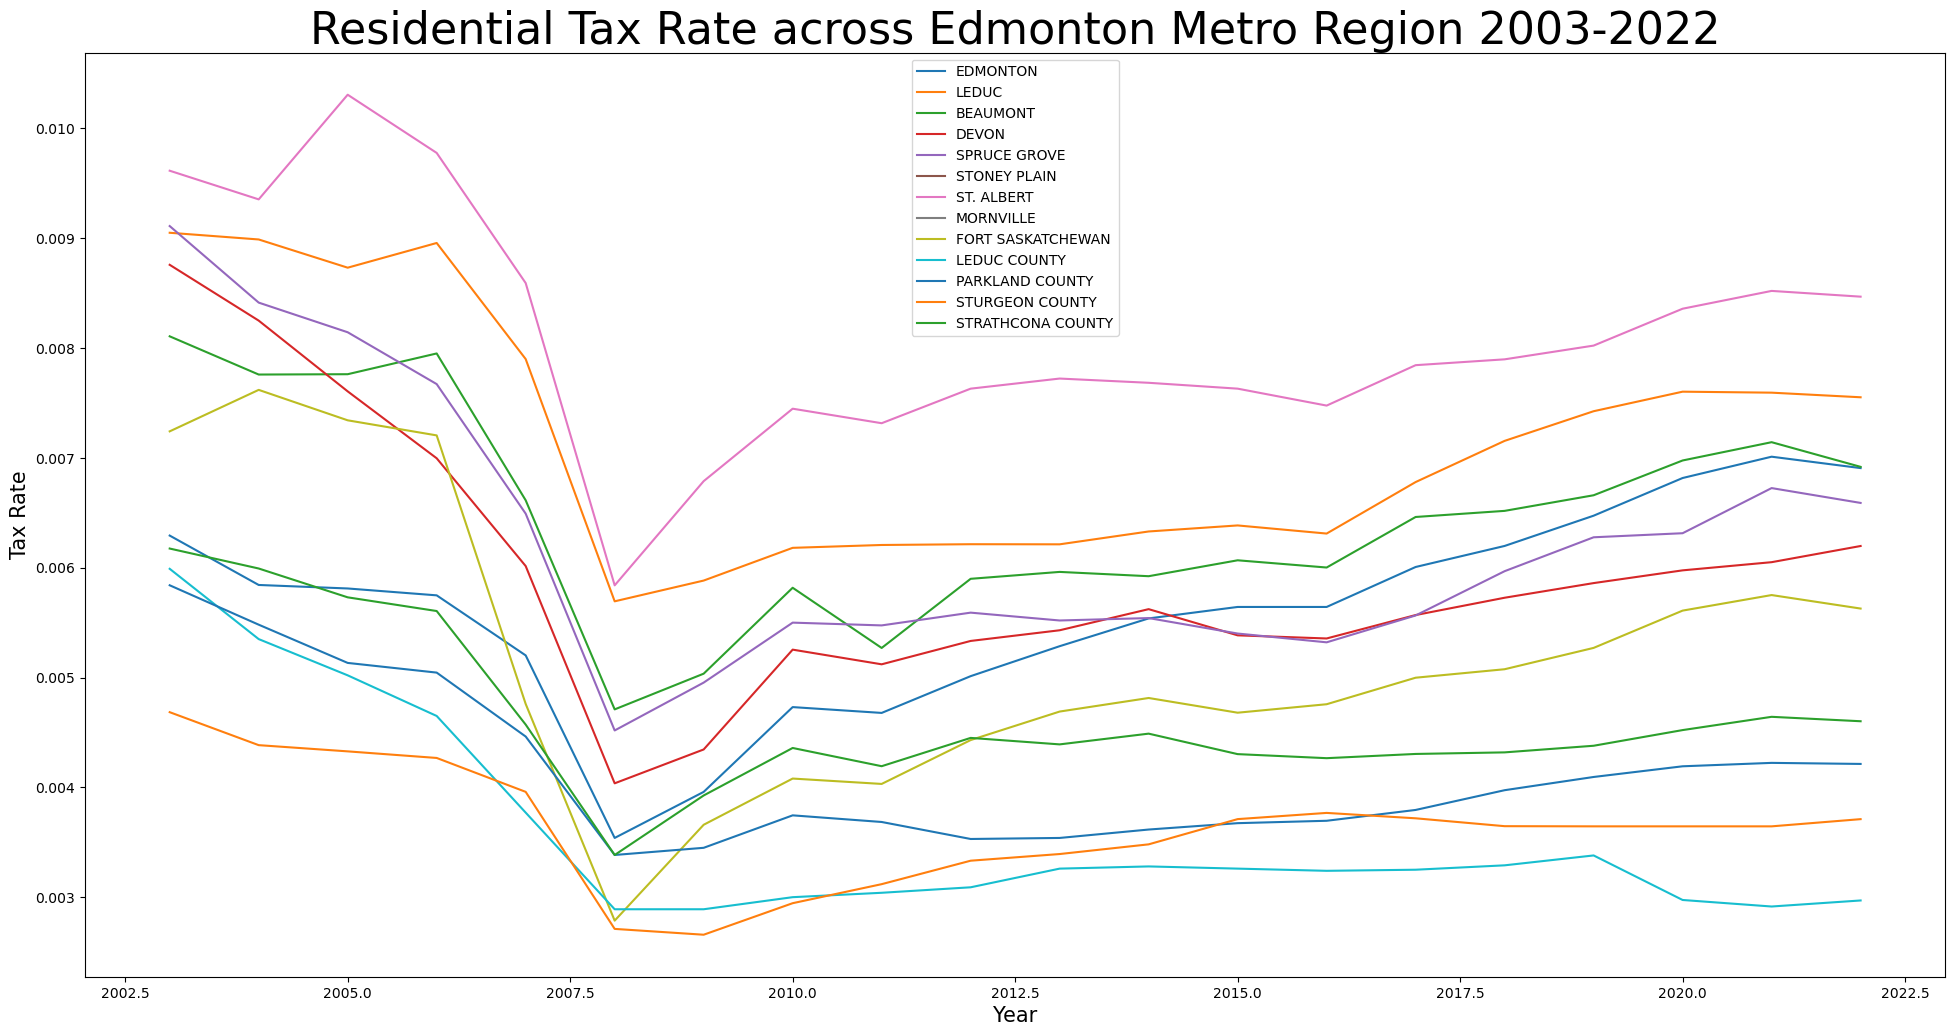

In [59]:
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(edmonton_metro)]
# change to residentialtotaltax
plt.figure(figsize=(24,12))
for city in edmonton_metro:
    plt.plot(data[data['Municipality'] == city]['Year'], data[data['Municipality'] == city]['Residential'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate across Edmonton Metro Region 2003-2022', fontsize=32)
plt.legend()
plt.show()

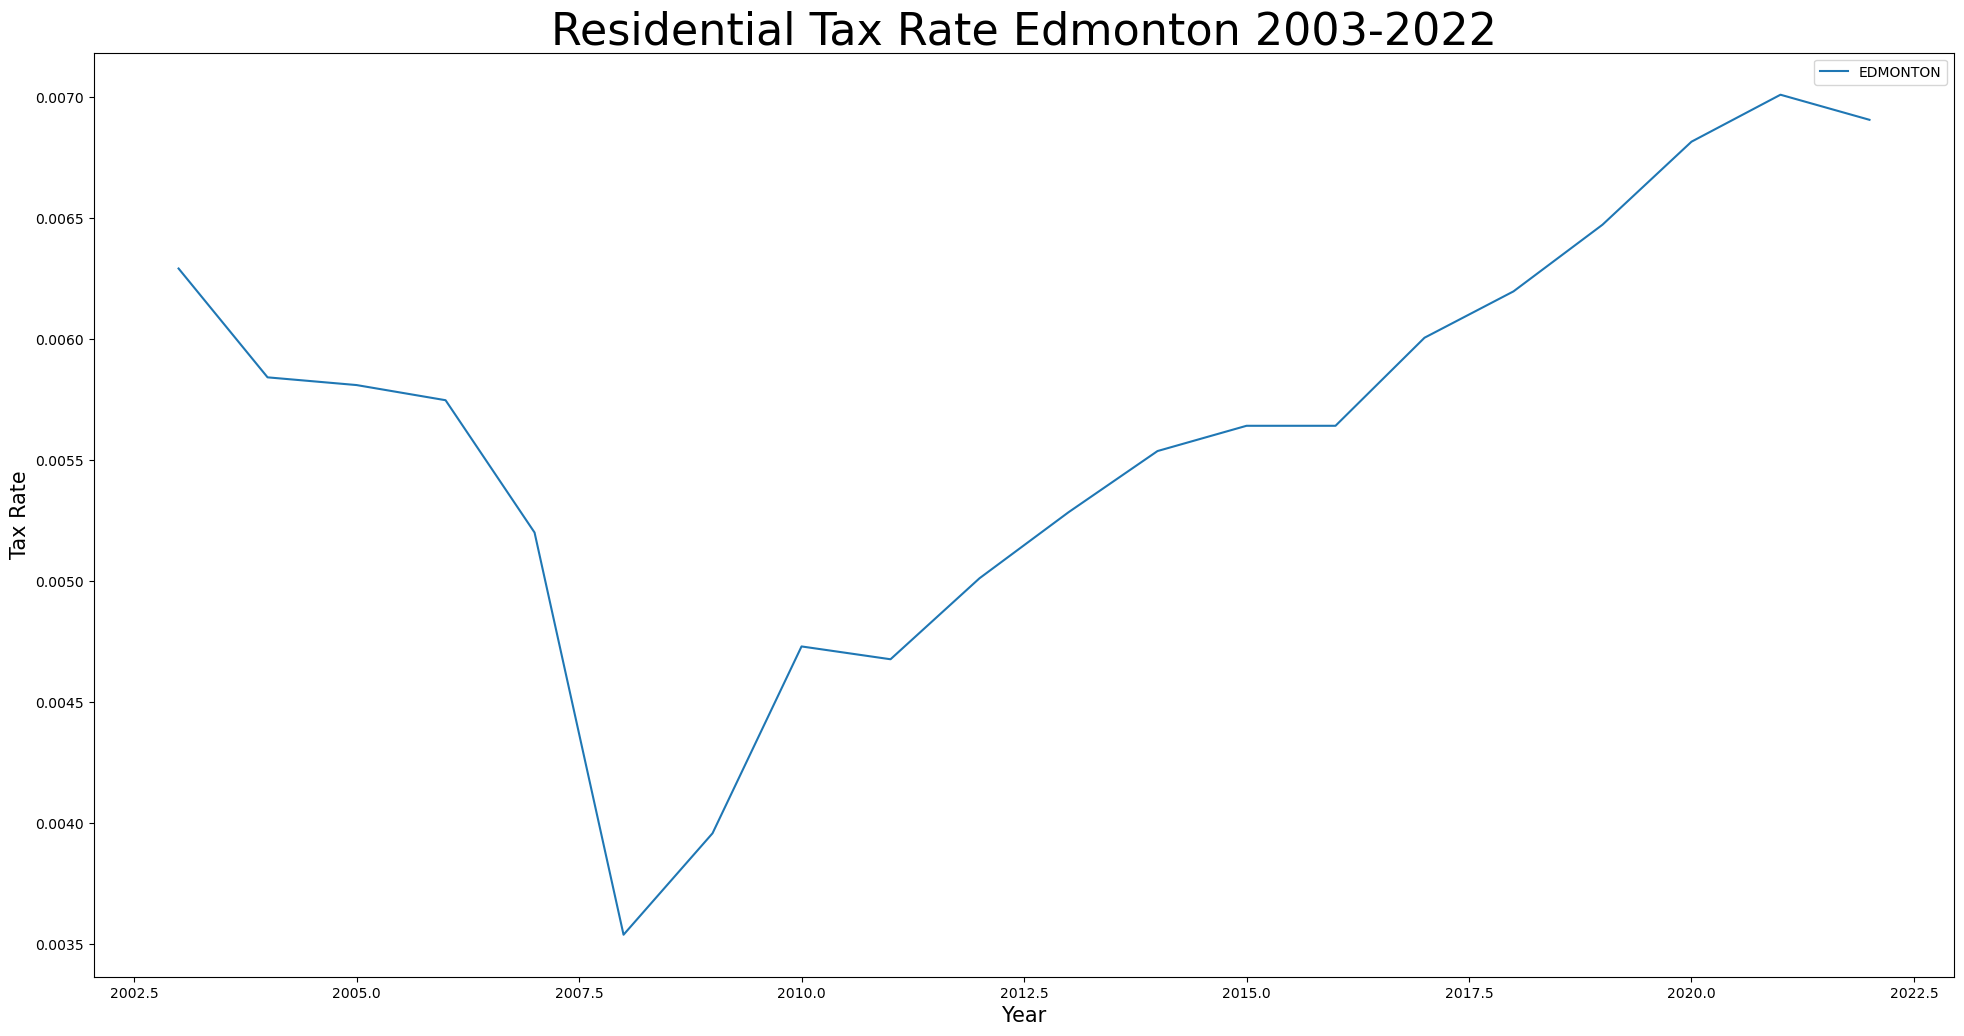

In [60]:
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(edmonton_metro)]
# change to residentialtotaltax
plt.figure(figsize=(24,12))
plt.plot(data[data['Municipality'] == 'EDMONTON']['Year'], data[data['Municipality'] == 'EDMONTON']['Residential'], label='EDMONTON')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate Edmonton 2003-2022', fontsize=32)
plt.legend()
plt.show()

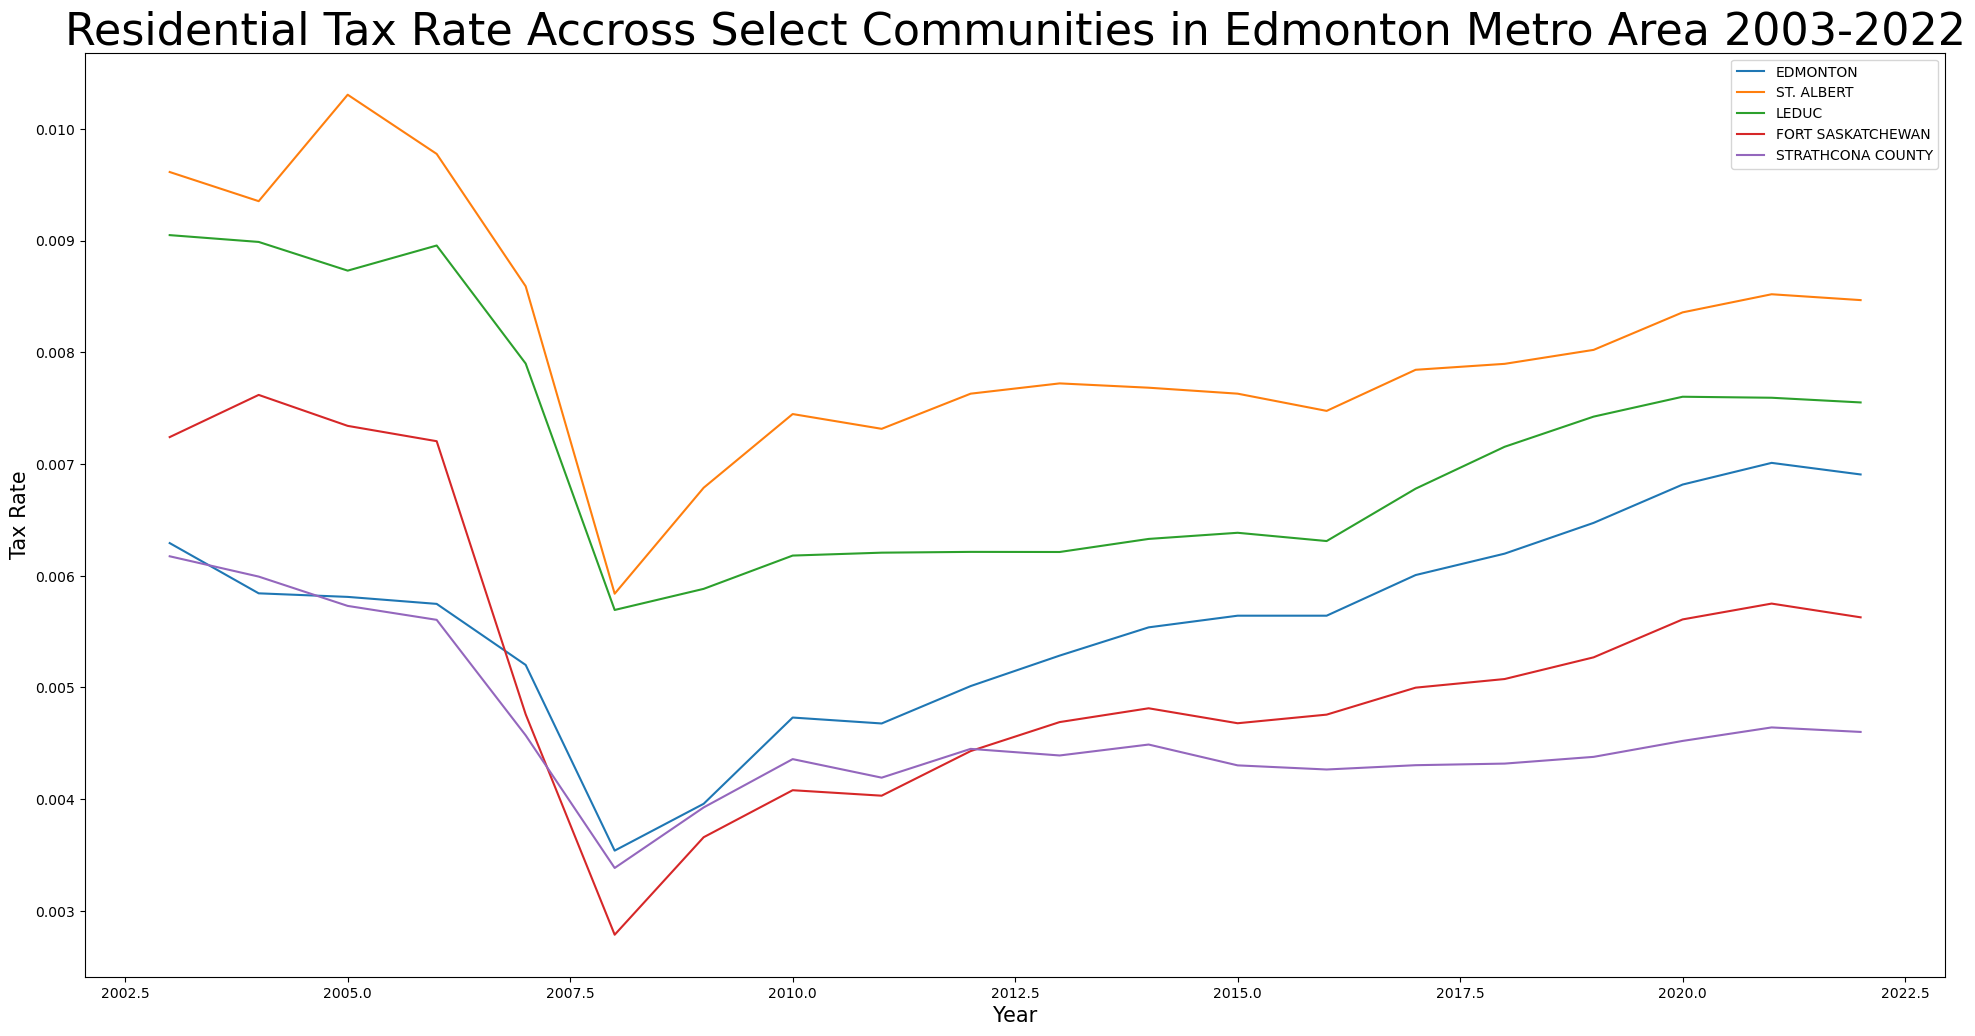

In [61]:
cities = ['EDMONTON', 'ST. ALBERT', 'LEDUC', 'FORT SASKATCHEWAN', 'STRATHCONA COUNTY']
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(cities)]
# change to residentialtotaltax
plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipality'] == city]['Year'], data[data['Municipality'] == city]['Residential'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate Accross Select Communities in Edmonton Metro Area 2003-2022', fontsize=32)
plt.legend()
plt.show()

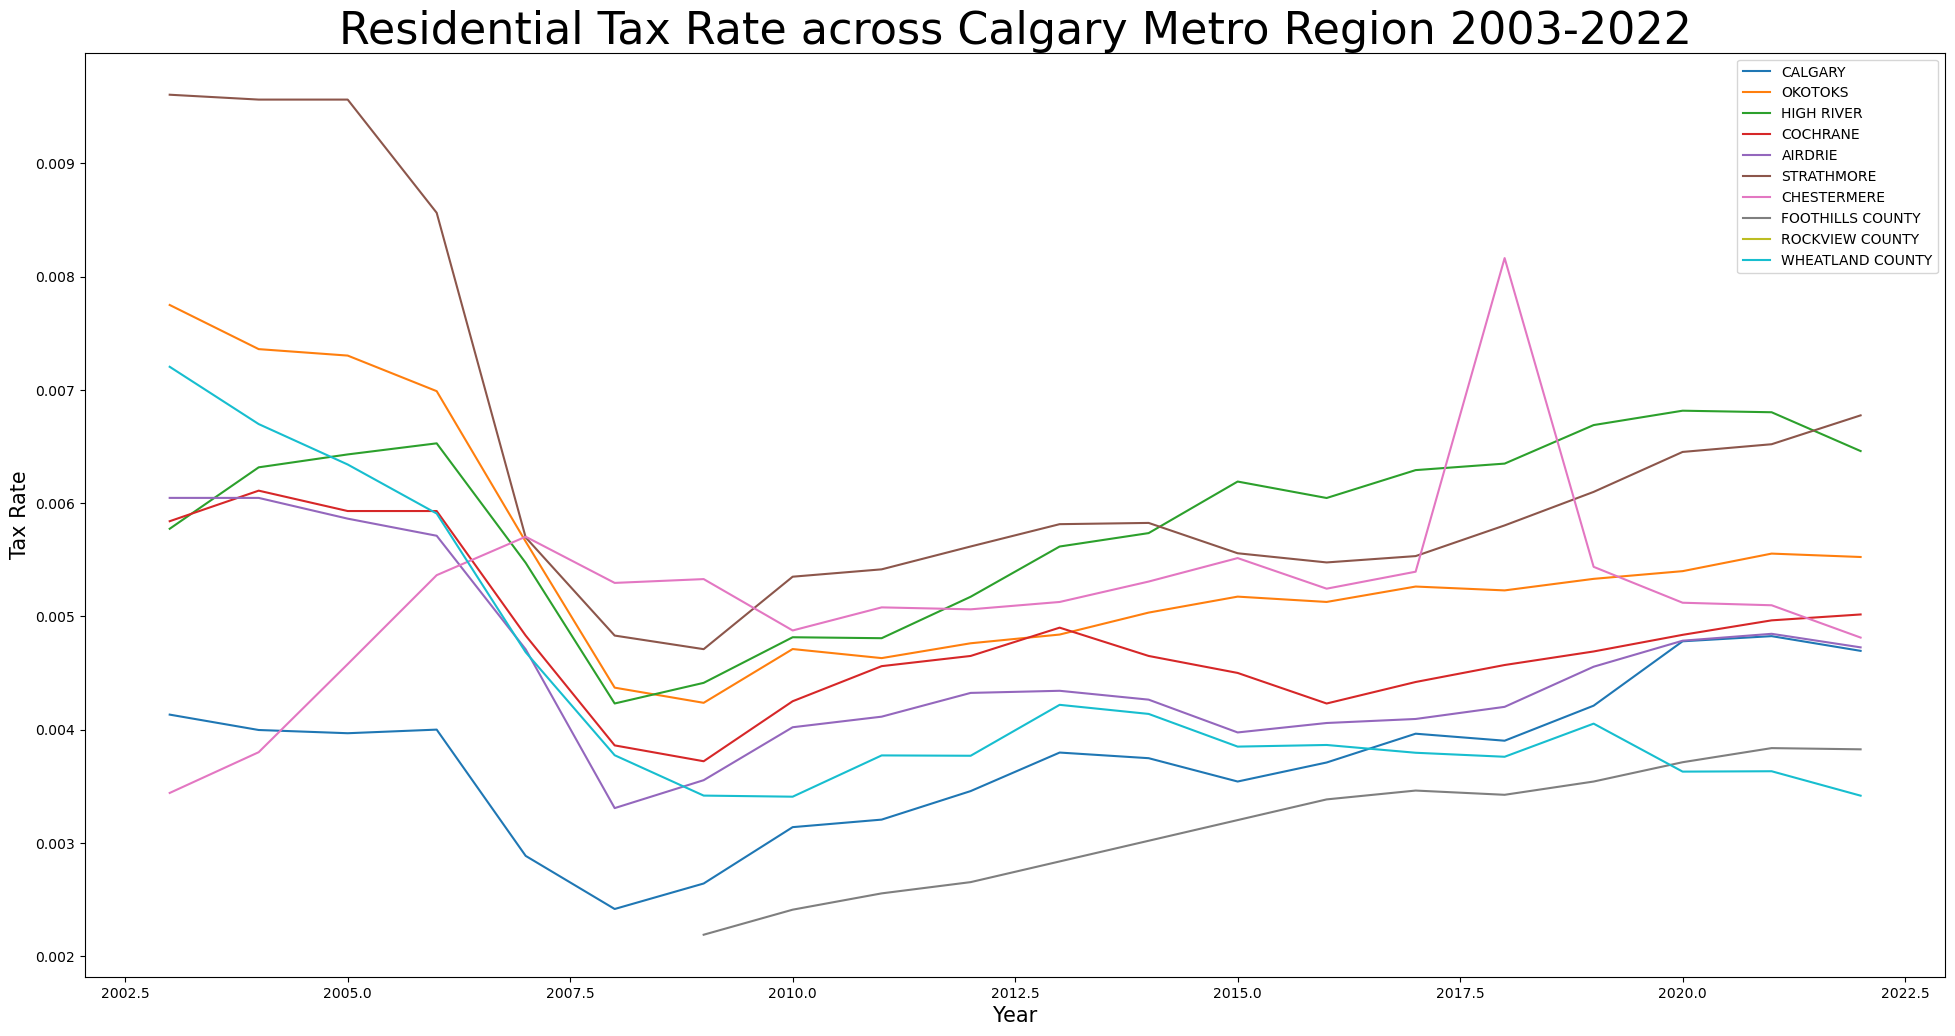

In [62]:
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(calgary_metro)]
# change to residentialtotaltax
plt.figure(figsize=(24,12))
for city in calgary_metro:
    plt.plot(data[data['Municipality'] == city]['Year'], data[data['Municipality'] == city]['Residential'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate across Calgary Metro Region 2003-2022', fontsize=32)
plt.legend()
plt.show()

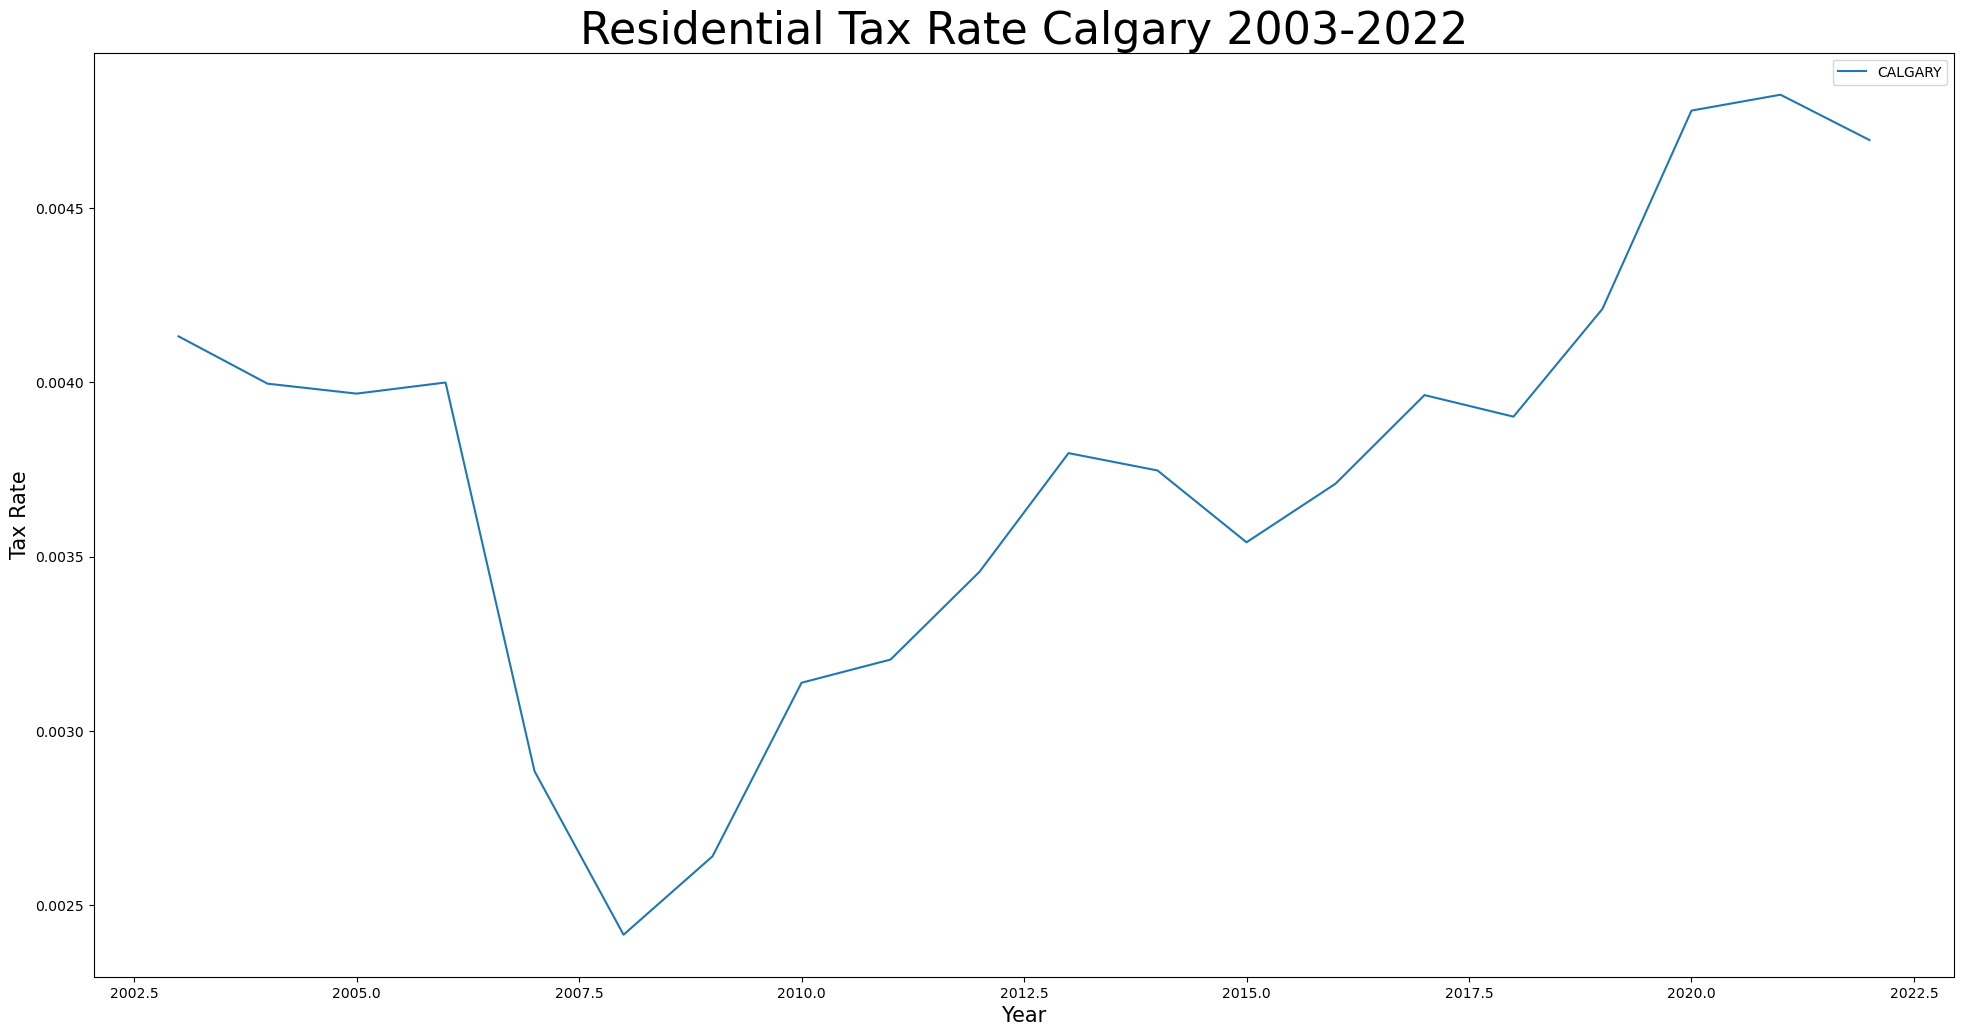

In [63]:
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(calgary_metro)]
# change to residentialtotaltax
plt.figure(figsize=(24,12))
plt.plot(data[data['Municipality'] == 'CALGARY']['Year'], data[data['Municipality'] == 'CALGARY']['Residential'], label='CALGARY')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate Calgary 2003-2022', fontsize=32)
plt.legend()
plt.show()

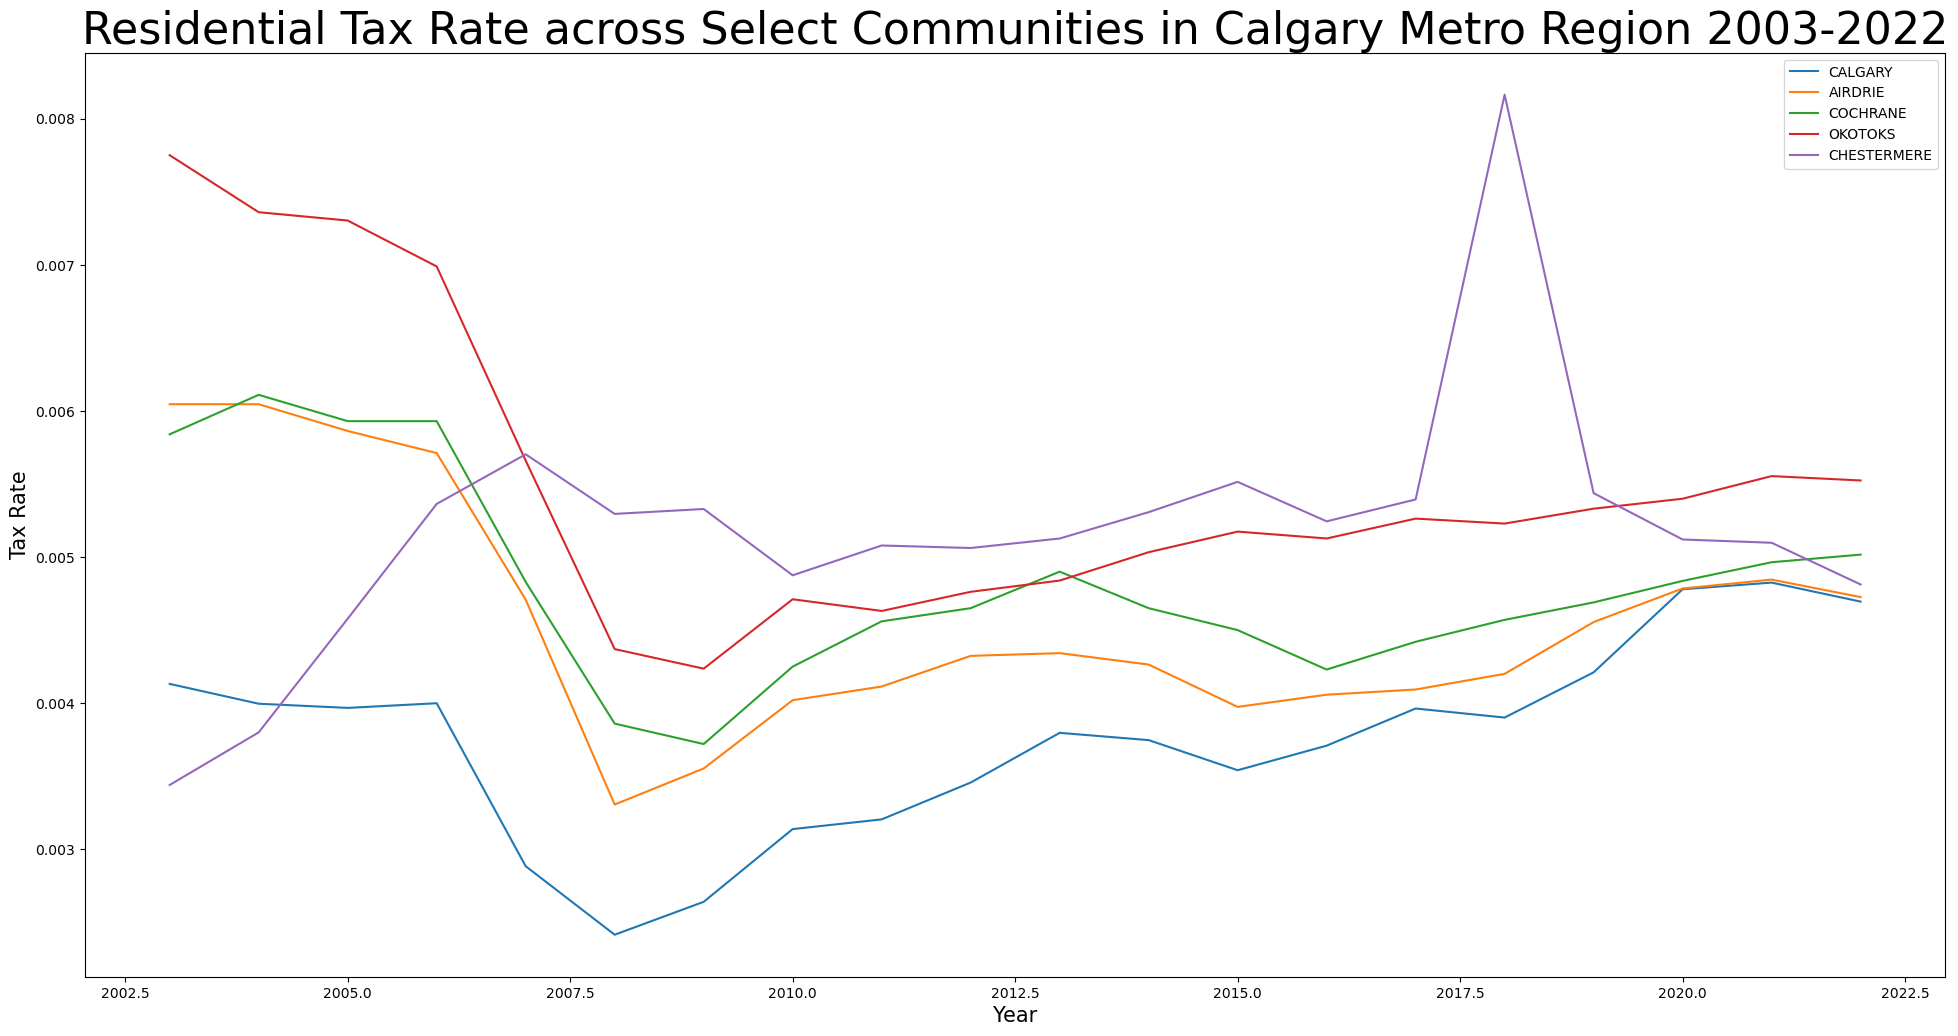

In [64]:
cities = ['CALGARY', 'AIRDRIE', 'COCHRANE', 'OKOTOKS', 'CHESTERMERE']
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(cities)]
# change to residentialtotaltax
plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipality'] == city]['Year'], data[data['Municipality'] == city]['Residential'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Residential Tax Rate across Select Communities in Calgary Metro Region 2003-2022', fontsize=32)
plt.legend()
plt.show()

In [65]:
ab_ptax21_03.head()

,Year,STATUS,CODE,Municipality,Education,Seniors Lodge Accommodation Tax Rate,Residential,NonRes/Res Tax Ratio,Farm,ResidentialTotalTax,NonResidential,NonResidential Education,NonResidentialTotalTax,FarmTotalTax
0,2003.0,City,3.0,AIRDRIE,0.003702,0.07729,0.006046,1.760953,0.006046,0.009748,0.010647,0.006396,0.017043,0.009748
1,2003.0,City,46.0,CALGARY,0.004305,0.00000,0.004132,3.509149,0.004132,0.008437,0.014499,0.007275,0.021774,0.008437
2,2003.0,City,48.0,CAMROSE,0.004444,0.00000,0.009965,1.674474,0.009965,0.014409,0.016686,0.006767,0.023454,0.014409
3,2003.0,City,525.0,COLD LAKE,0.004370,0.09000,0.005800,1.894828,0.005800,0.010170,0.010990,0.007210,0.018200,0.010170
4,2003.0,City,98.0,EDMONTON,0.004322,0.00000,0.006293,2.451587,0.006293,0.010615,0.015427,0.007387,0.022814,0.010615


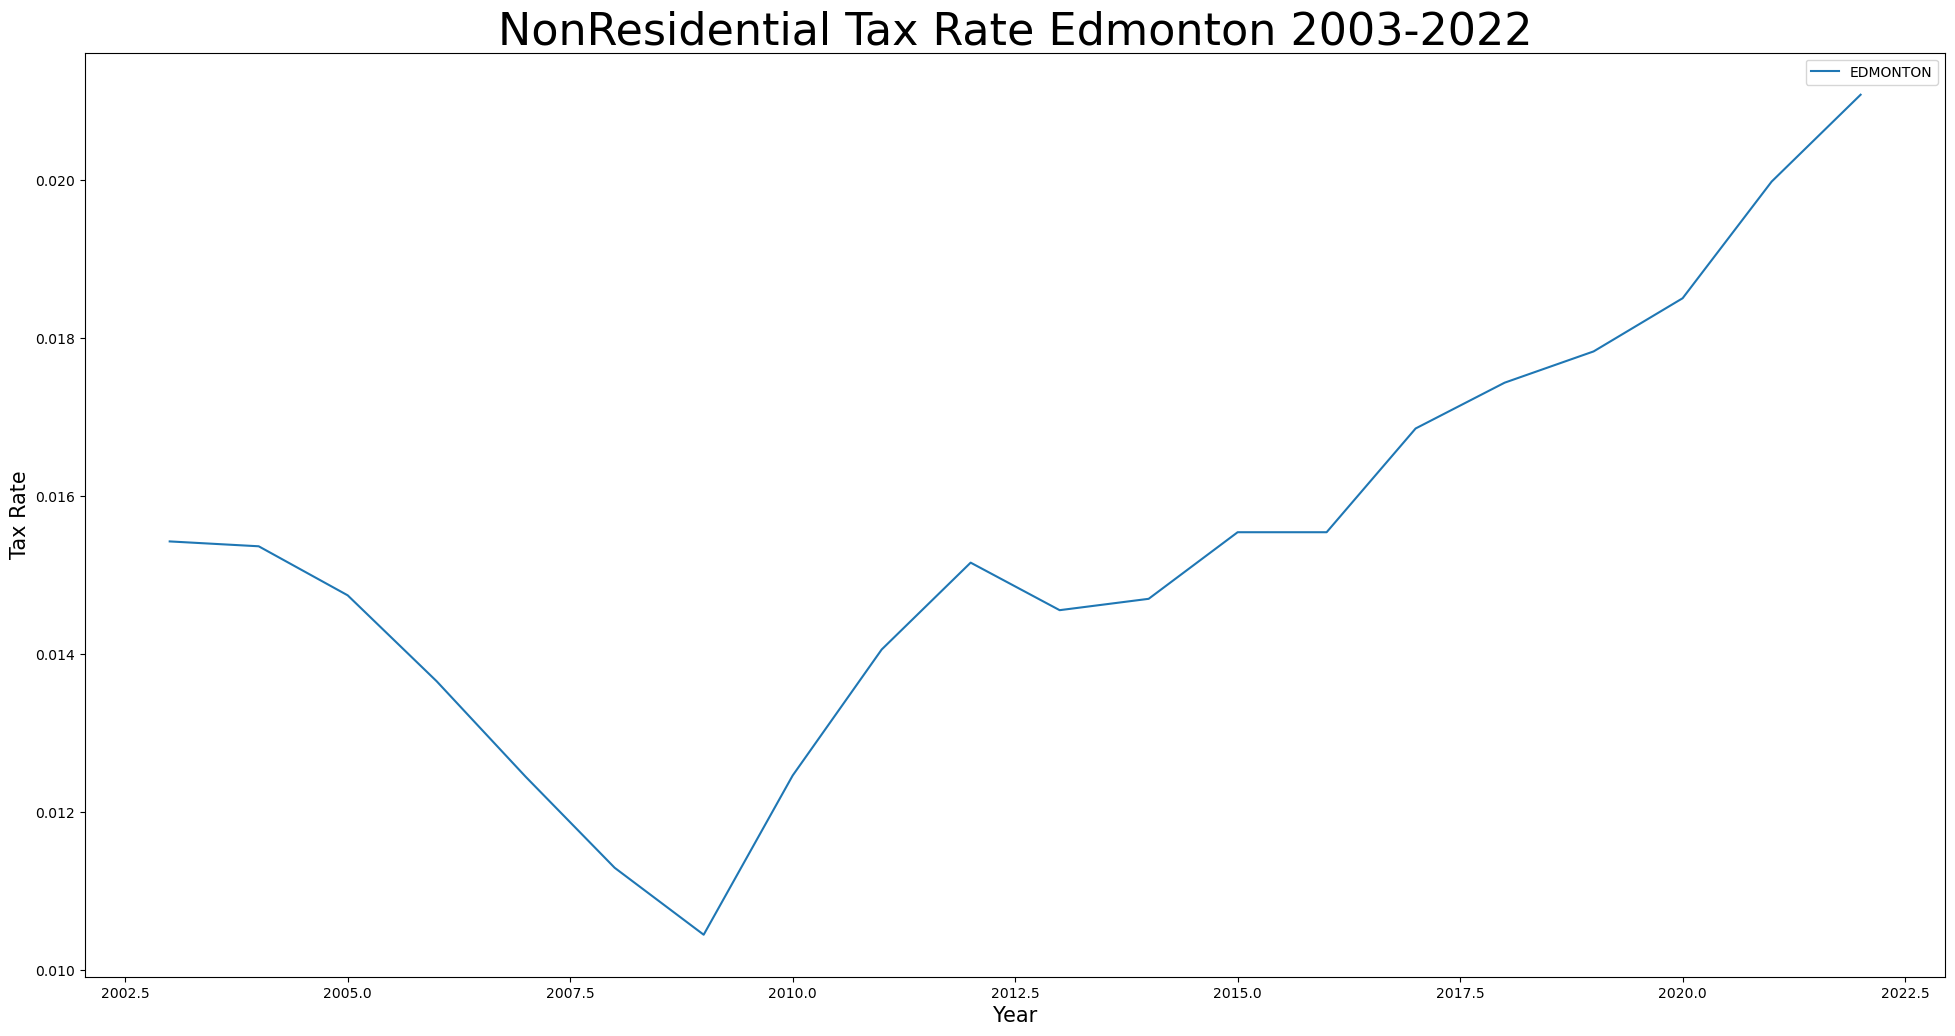

In [66]:
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(edmonton_metro)]
# change to residentialtotaltax
plt.figure(figsize=(24,12))
plt.plot(data[data['Municipality'] == 'EDMONTON']['Year'], data[data['Municipality'] == 'EDMONTON']['NonResidential'], label='EDMONTON')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('NonResidential Tax Rate Edmonton 2003-2022', fontsize=32)
plt.legend()
plt.show()

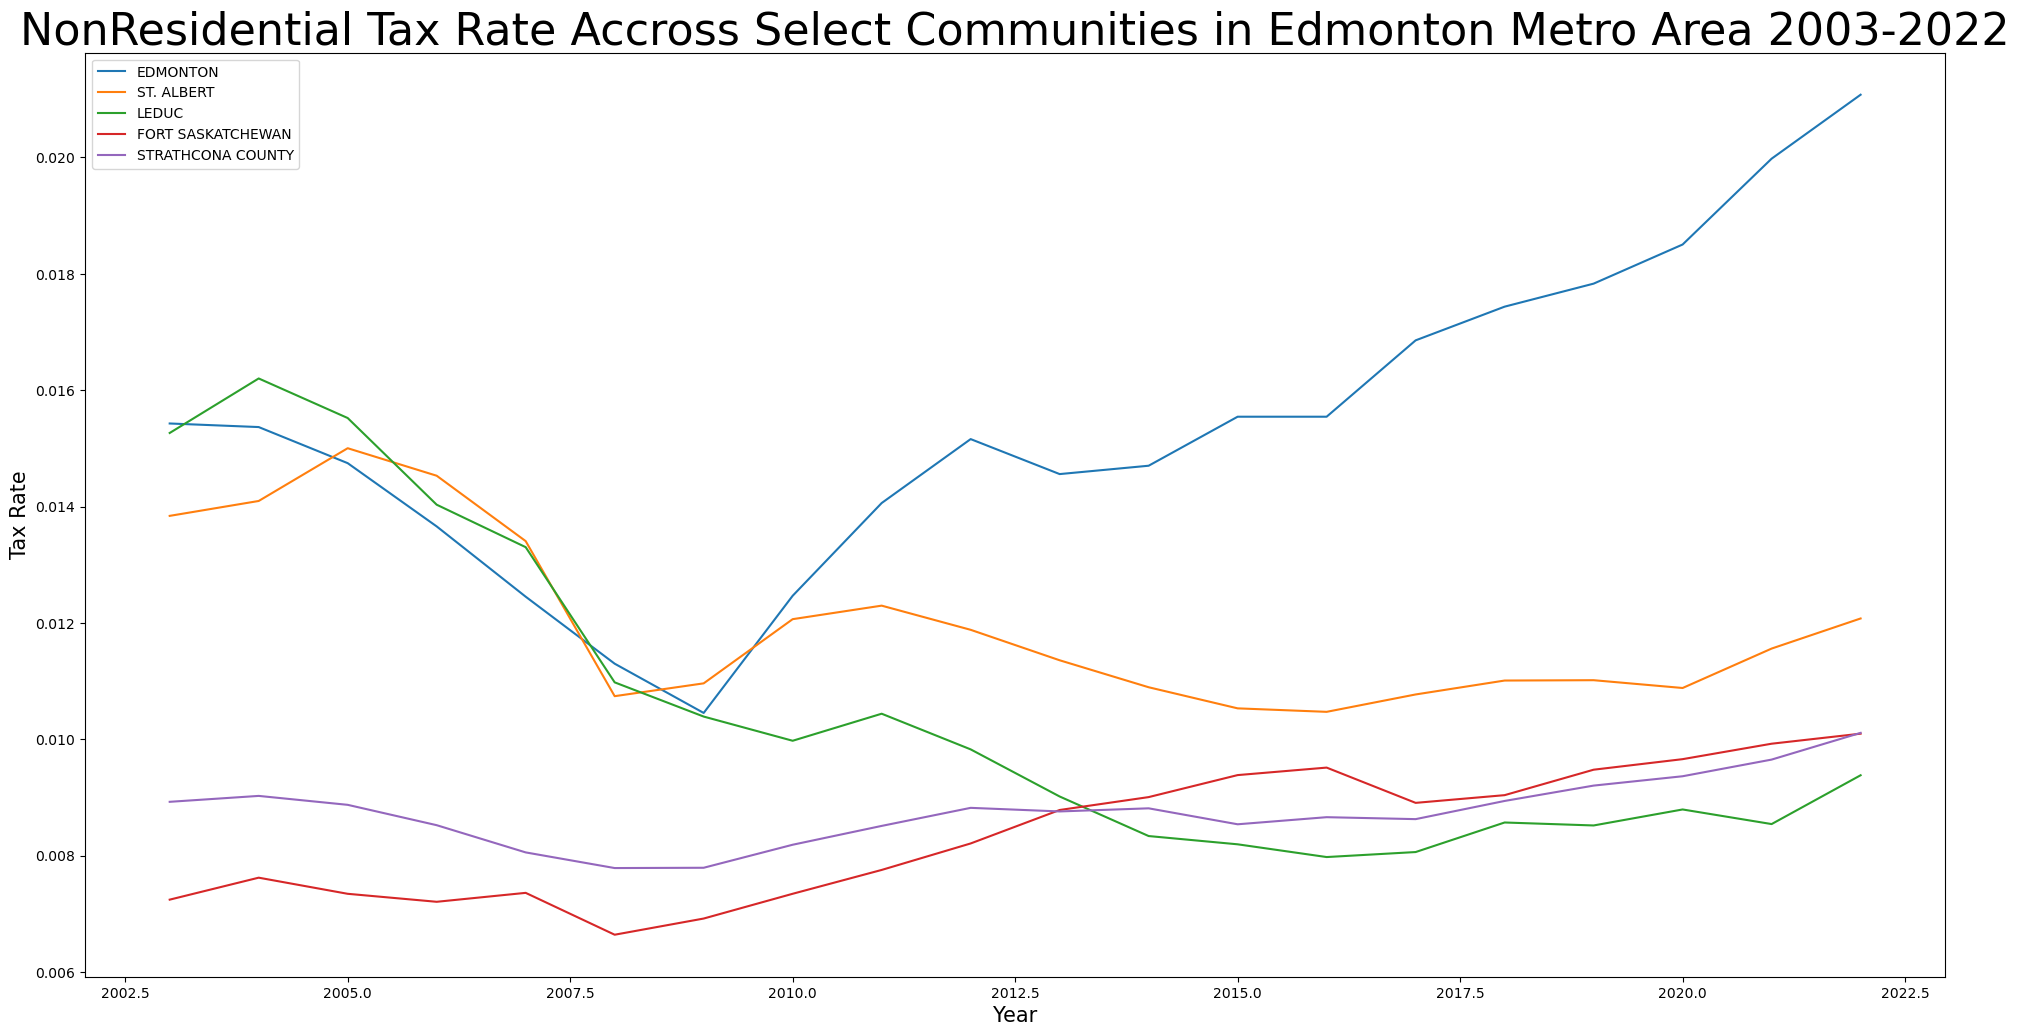

In [67]:
cities = ['EDMONTON', 'ST. ALBERT', 'LEDUC', 'FORT SASKATCHEWAN', 'STRATHCONA COUNTY']
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(cities)]
# change to residentialtotaltax
plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipality'] == city]['Year'], data[data['Municipality'] == city]['NonResidential'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('NonResidential Tax Rate Accross Select Communities in Edmonton Metro Area 2003-2022', fontsize=32)
plt.legend()
plt.show()

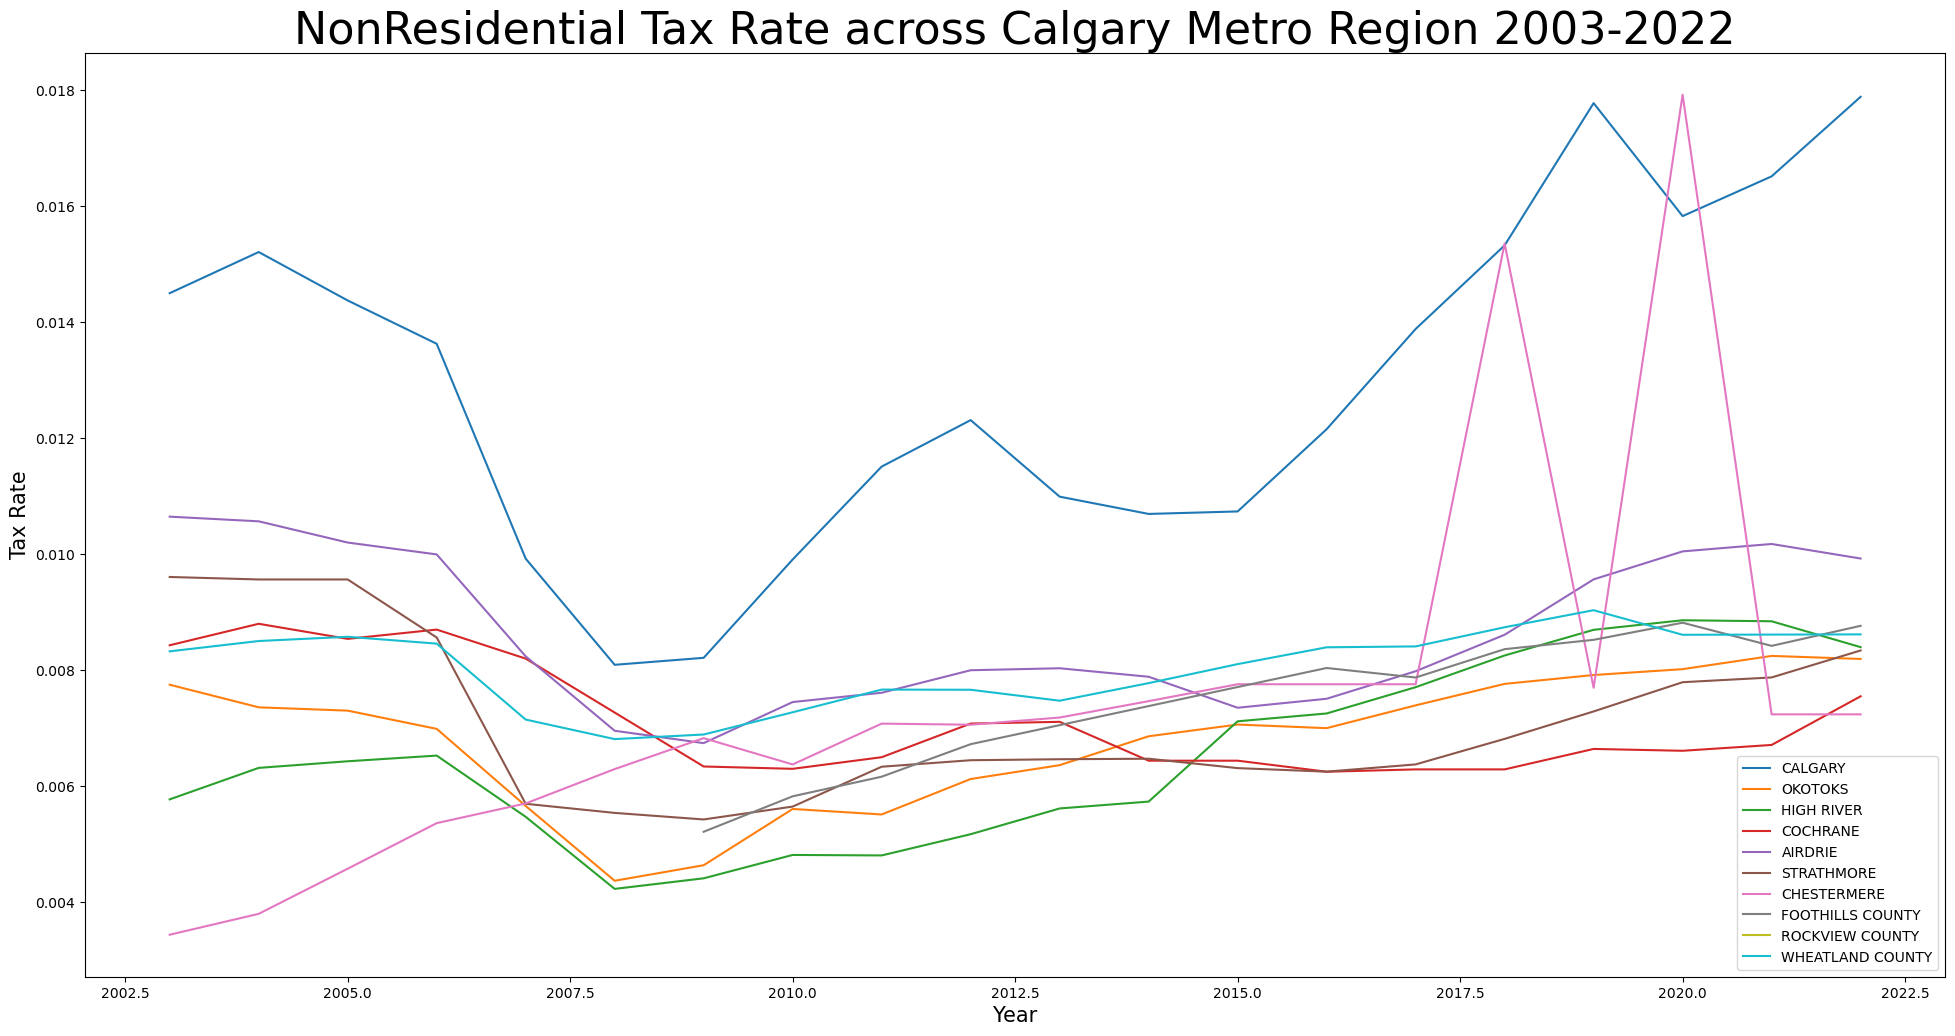

In [68]:
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(calgary_metro)]
# change to residentialtotaltax
plt.figure(figsize=(24,12))
for city in calgary_metro:
    plt.plot(data[data['Municipality'] == city]['Year'], data[data['Municipality'] == city]['NonResidential'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('NonResidential Tax Rate across Calgary Metro Region 2003-2022', fontsize=32)
plt.legend()
plt.show()

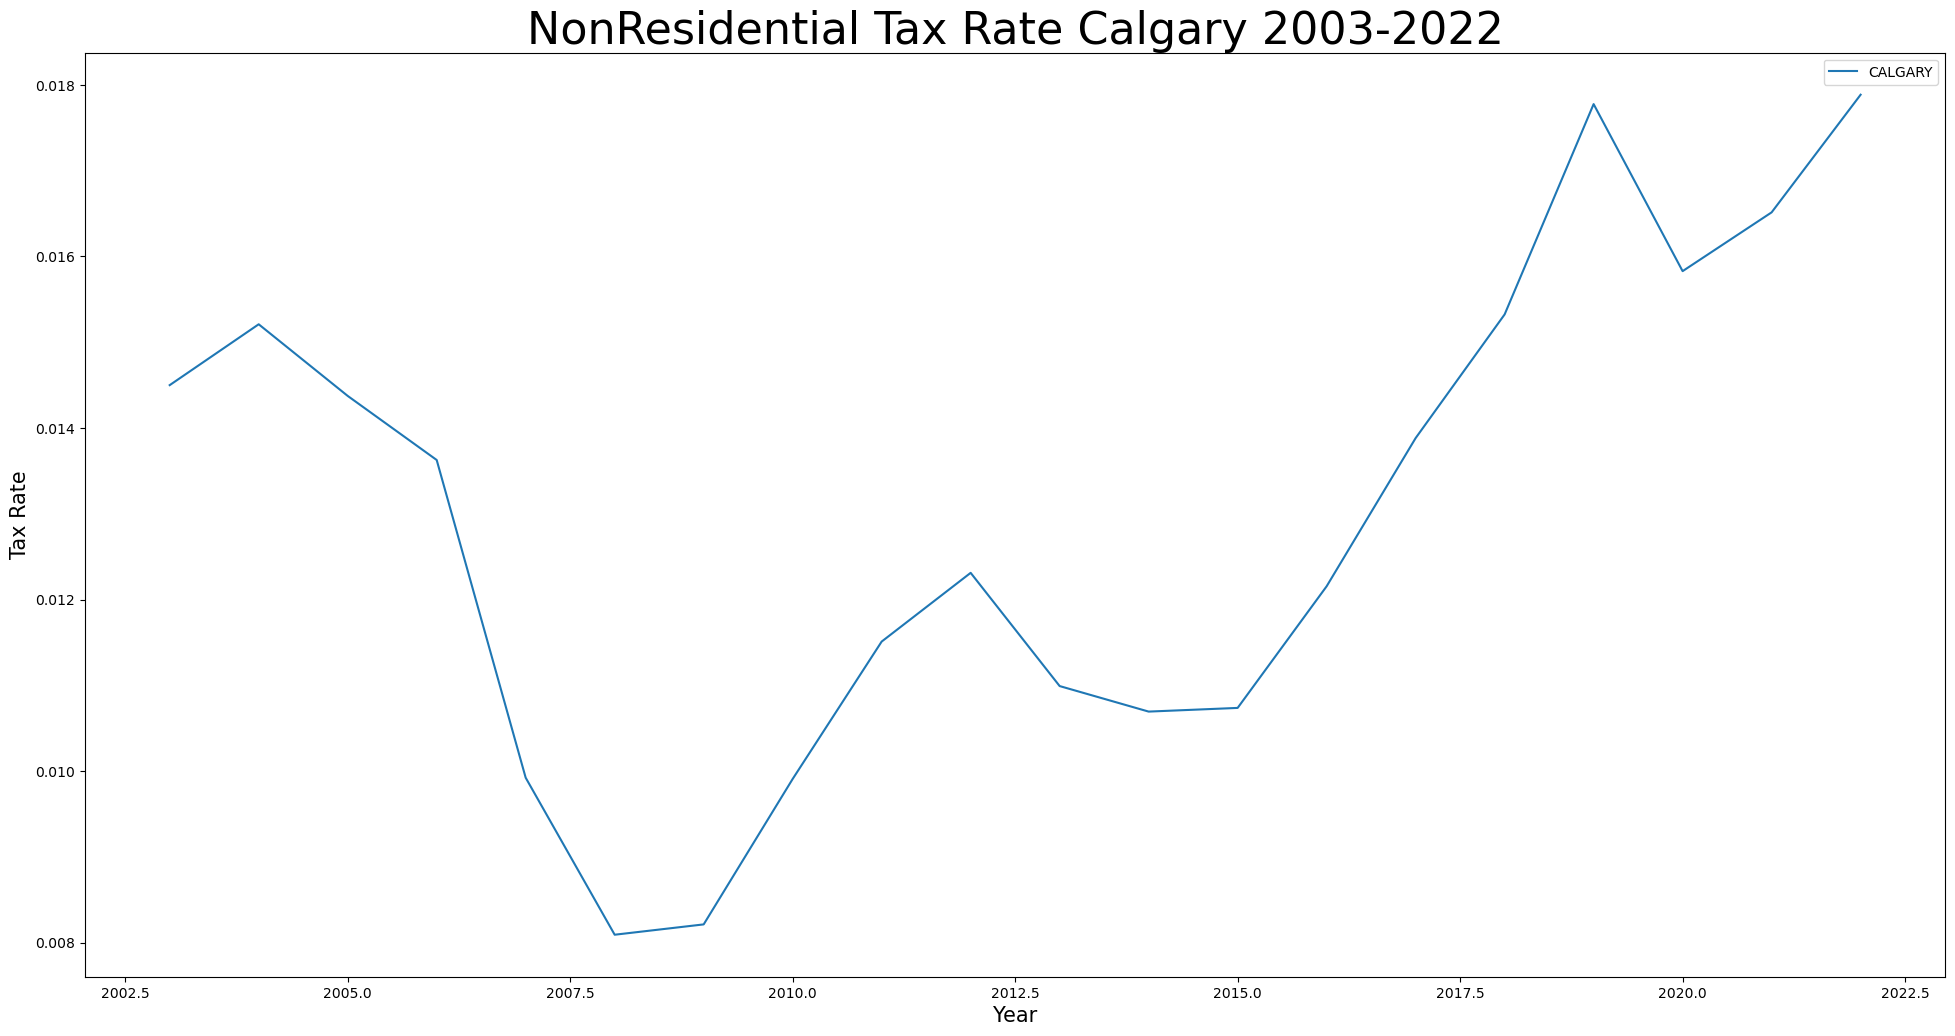

In [69]:
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(calgary_metro)]
# change to residentialtotaltax
plt.figure(figsize=(24,12))
plt.plot(data[data['Municipality'] == 'CALGARY']['Year'], data[data['Municipality'] == 'CALGARY']['NonResidential'], label='CALGARY')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('NonResidential Tax Rate Calgary 2003-2022', fontsize=32)
plt.legend()
plt.show()

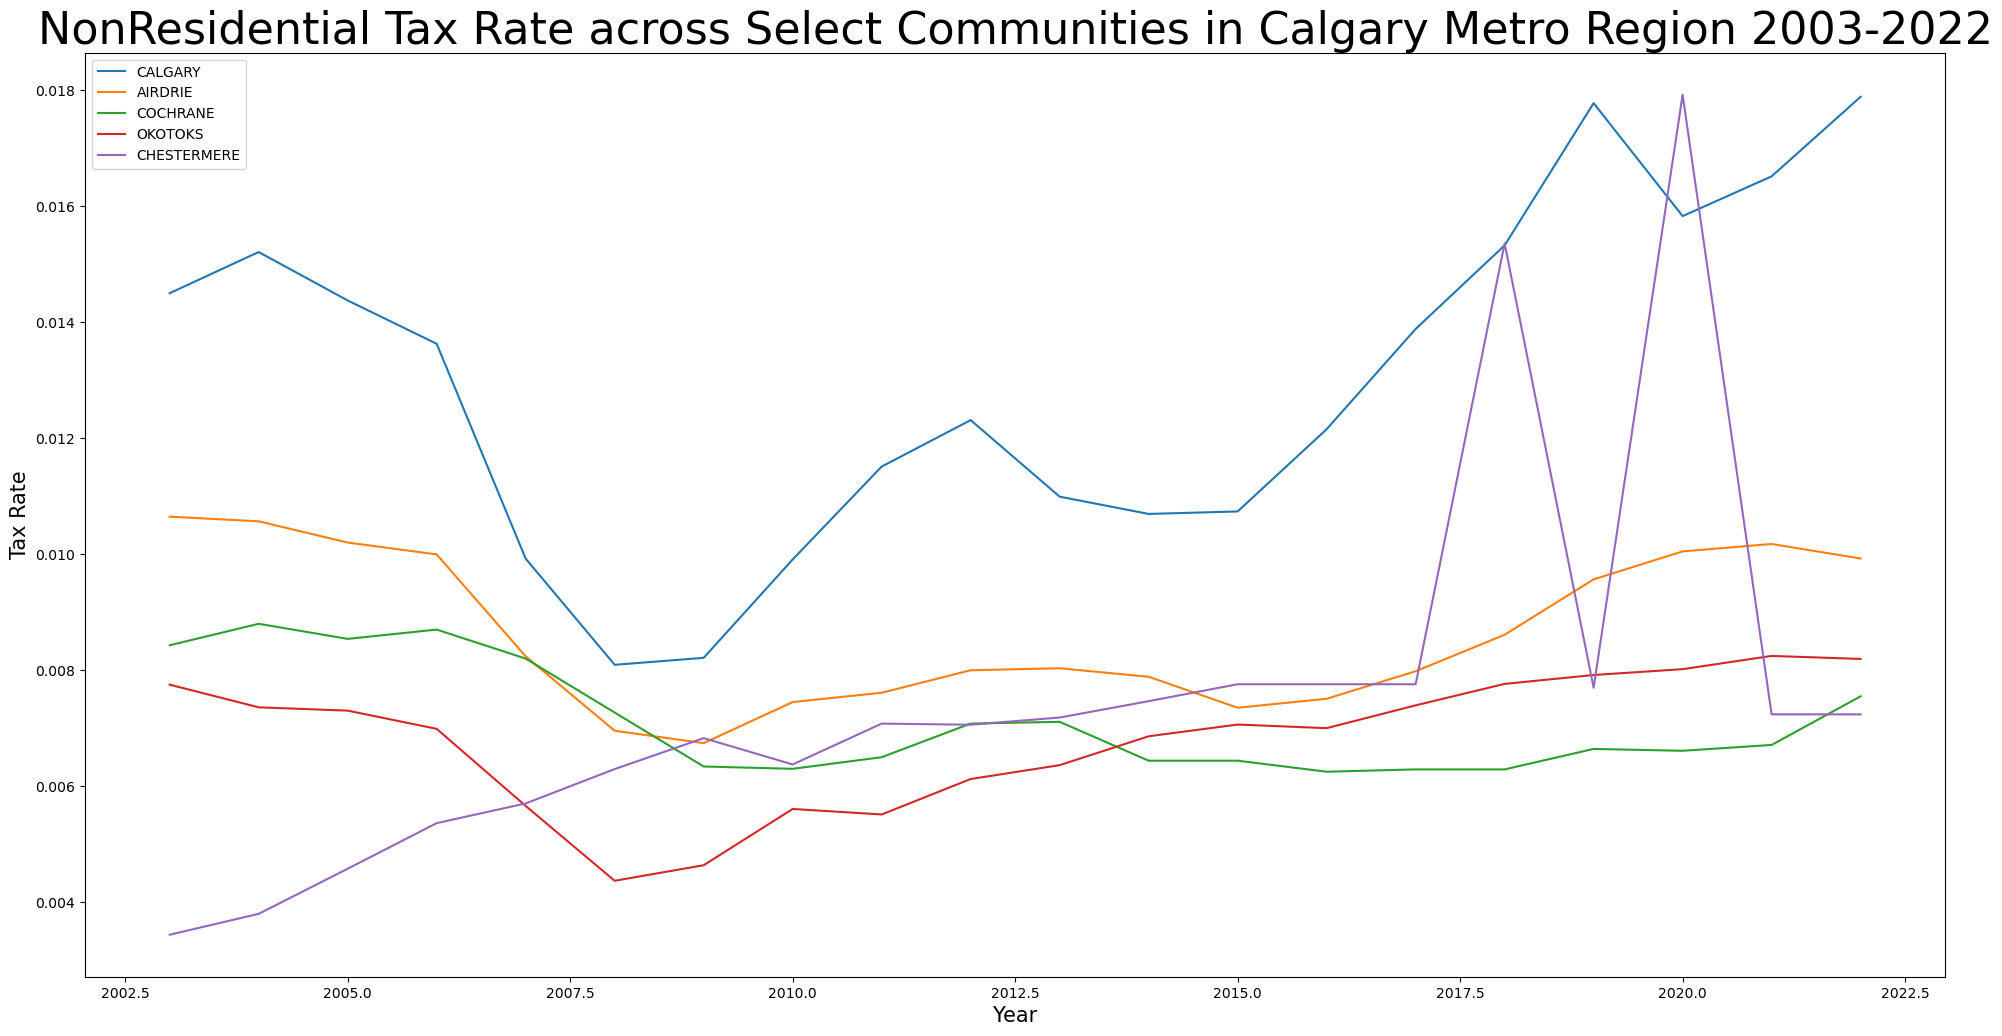

In [70]:
cities = ['CALGARY', 'AIRDRIE', 'COCHRANE', 'OKOTOKS', 'CHESTERMERE']
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(cities)]
# change to residentialtotaltax
plt.figure(figsize=(24,12))
for city in cities:
    plt.plot(data[data['Municipality'] == city]['Year'], data[data['Municipality'] == city]['NonResidential'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('NonResidential Tax Rate across Select Communities in Calgary Metro Region 2003-2022', fontsize=32)
plt.legend()
plt.show()

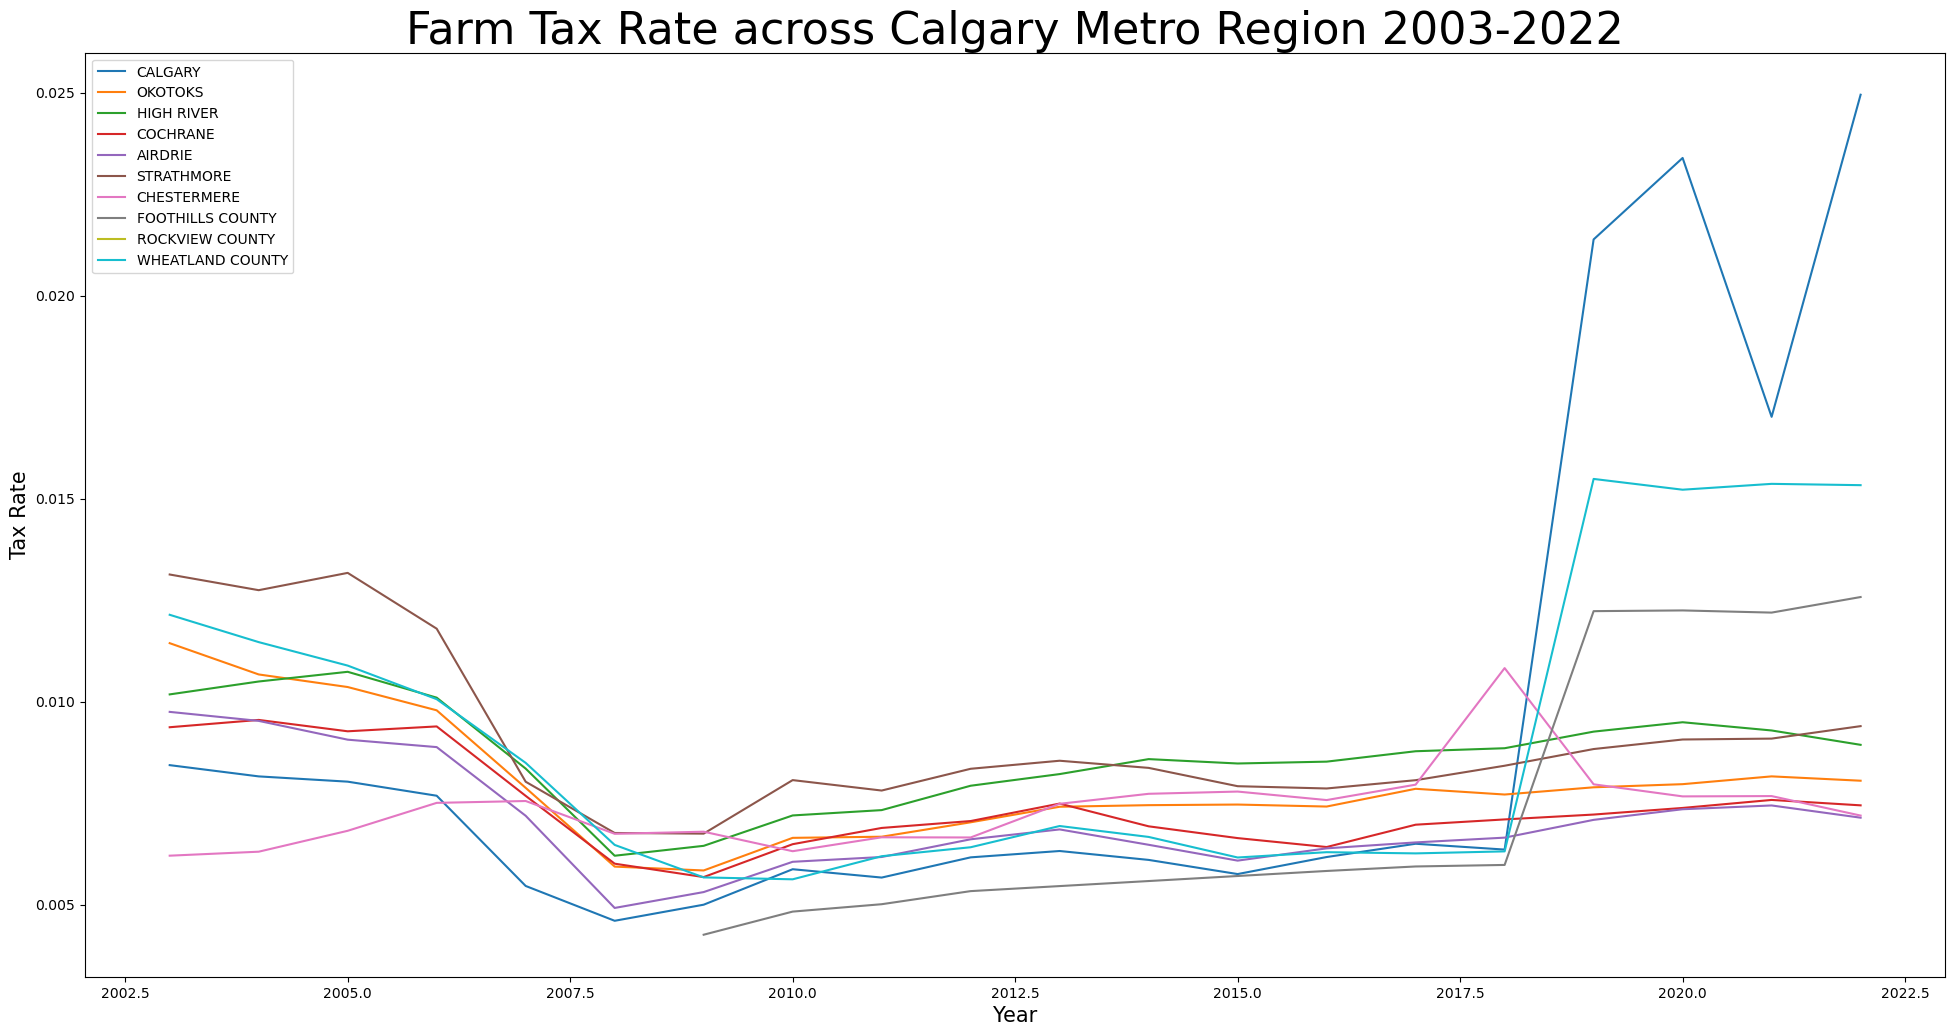

In [71]:
# Something strange here & also for Edmonton farm rates - need to double check farm rates 
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(calgary_metro)]

plt.figure(figsize=(24,12))
for city in calgary_metro:
    plt.plot(data[data['Municipality'] == city]['Year'], data[data['Municipality'] == city]['FarmTotalTax'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Farm Tax Rate across Calgary Metro Region 2003-2022', fontsize=32)
plt.legend()
plt.show()

In [72]:
ab_ptax21_03[ab_ptax21_03['Municipality'] == 'CALGARY']

,Year,STATUS,CODE,Municipality,Education,Seniors Lodge Accommodation Tax Rate,Residential,NonRes/Res Tax Ratio,Farm,ResidentialTotalTax,NonResidential,NonResidential Education,NonResidentialTotalTax,FarmTotalTax
1,2003.0,City,46.0,CALGARY,0.004305,0.0,0.004132,3.509149,0.004132,0.008437,0.014499,0.007275,0.021774,0.008437
353,2004.0,City,46.0,CALGARY,0.004163,0.0,0.003996,3.805931,0.003996,0.008160,0.015209,0.007377,0.022586,0.008160
706,2005.0,City,46.0,CALGARY,0.004062,0.0,0.003967,3.622836,0.003967,0.008030,0.014374,0.006254,0.020628,0.008030
1057,2006.0,City,46.0,CALGARY,0.003684,NaN,0.003999,3.407161,0.003999,0.007683,0.013627,0.005400,0.019026,0.007683
1408,2007.0,City,46.0,CALGARY,0.002577,NaN,0.002884,3.440588,0.002884,0.005461,0.009923,0.003822,0.013745,0.005461
1760,2008.0,City,46.0,CALGARY,0.002189,NaN,0.002415,3.350959,0.002415,0.004604,0.008093,0.003216,0.011309,0.004604
2110,2009.0,City,46.0,CALGARY,0.002360,NaN,0.002640,3.110825,0.002640,0.005000,0.008213,0.003228,0.011441,0.005000
2459,2010.0,City,46.0,CALGARY,0.002735,NaN,0.003138,3.157648,0.003138,0.005873,0.009909,0.003885,0.013794,0.005873
2807,2011.0,City,46.0,CALGARY,0.002463,0.0,0.003204,3.591793,0.003204,0.005668,0.011510,0.004099,0.015609,0.005668
3153,2012.0,City,46.0,CALGARY,0.002709,0.0,0.003457,3.561753,0.003457,0.006166,0.012311,0.003934,0.016245,0.006166


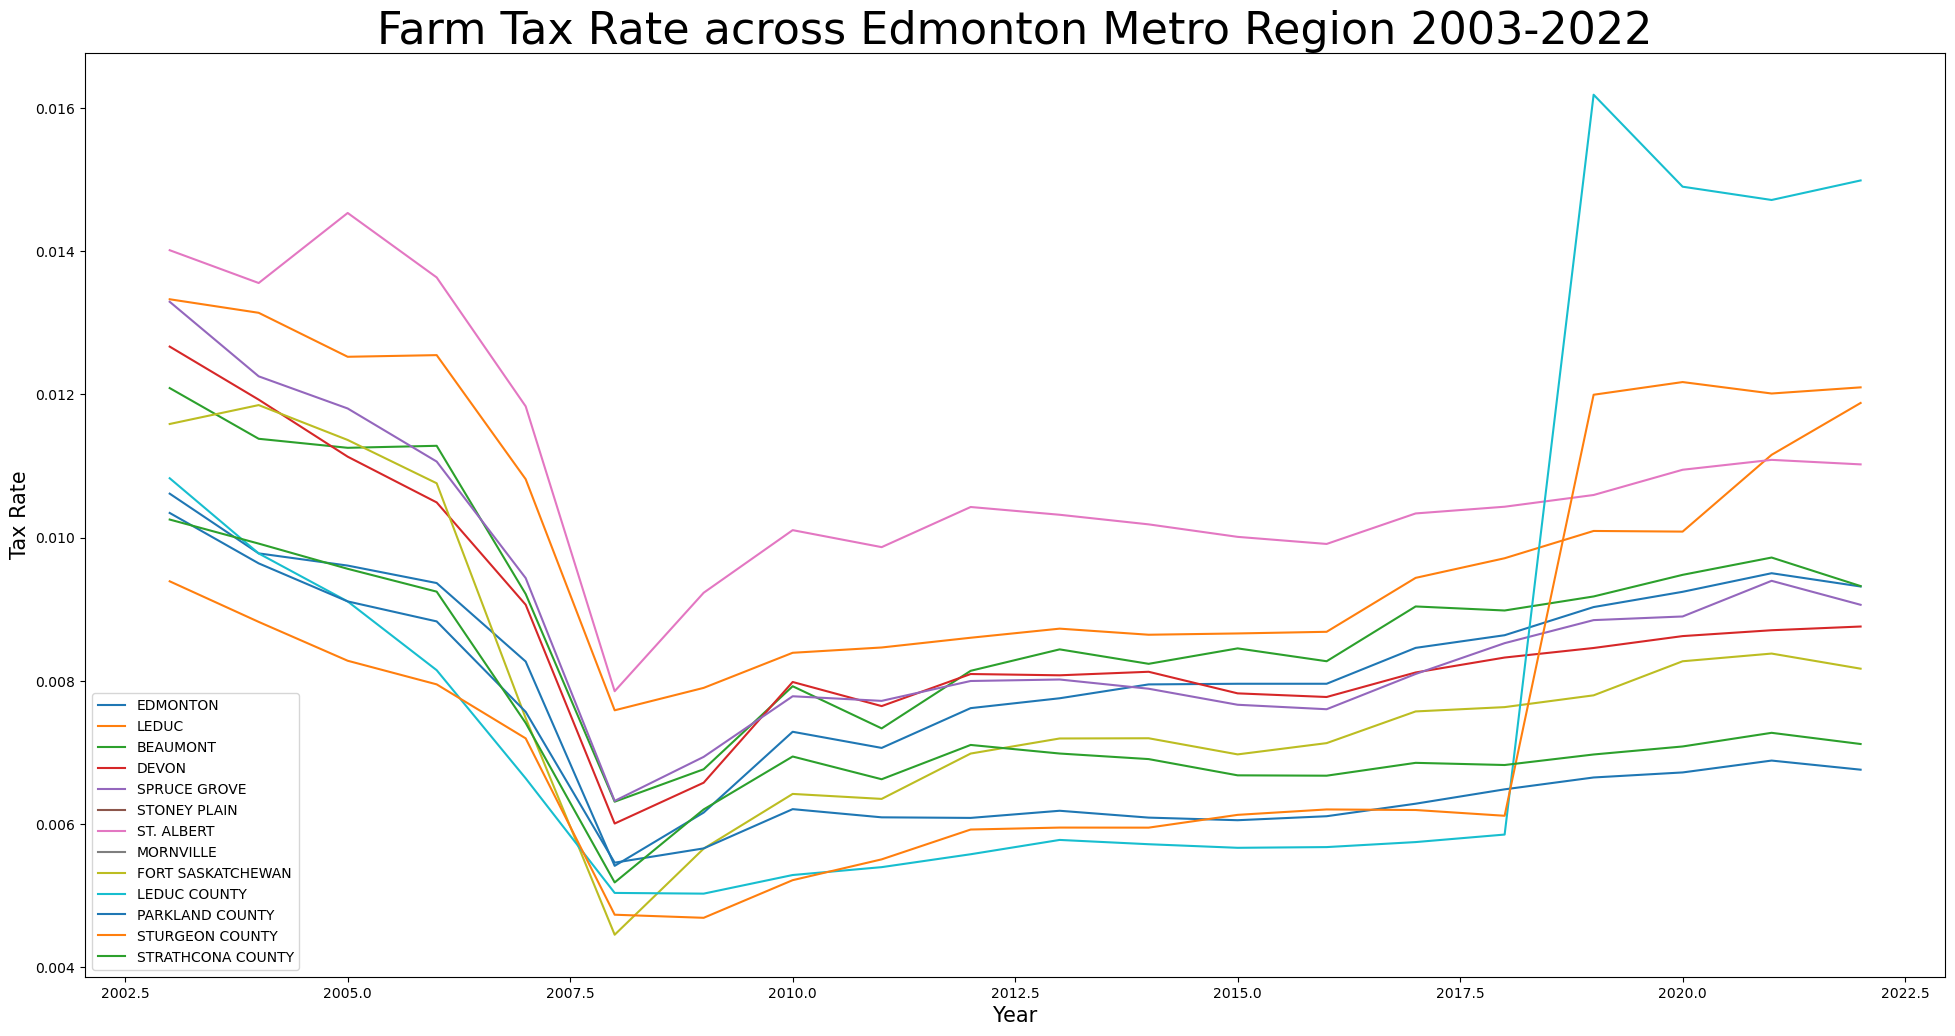

In [81]:
data = ab_ptax21_03[ab_ptax21_03['Municipality'].isin(edmonton_metro)]
# change to residentialtotaltax
plt.figure(figsize=(24,12))
for city in edmonton_metro:
    plt.plot(data[data['Municipality'] == city]['Year'], data[data['Municipality'] == city]['FarmTotalTax'], label=city)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Tax Rate', fontsize=15)
plt.title('Farm Tax Rate across Edmonton Metro Region 2003-2022', fontsize=32)
plt.legend()
plt.show()

In [73]:
ab_ptax21_03.shape

(6906, 14)

In [74]:
#need to fill NAs for Farm tax and create FarmTotalTax column

In [75]:
combine_frame = ab_ptax21_03[['Year', 'Municipality', 'ResidentialTotalTax', 'NonResidentialTotalTax', 'FarmTotalTax']].copy()

combine_frame.loc[: ,'PropertyClass'] = 'n'

In [76]:
combine_frame = combine_frame.loc[combine_frame.index.repeat(3),:].reset_index(drop=True)
idx_duplicate_res = combine_frame.duplicated(keep='last')
combine_frame.loc[idx_duplicate_res, 'PropertyClass'] = 'Residential'
combine_frame.loc[combine_frame['PropertyClass'] == 'n','PropertyClass'] = 'Farm'
idx_nonres = combine_frame.duplicated(keep='last')
combine_frame.loc[idx_nonres, 'PropertyClass'] = 'NonResidential'

In [77]:
combine_frame['Rate'] = 'n'
combine_frame.loc[combine_frame['PropertyClass'] == 'Residential', 'Rate'] = combine_frame['ResidentialTotalTax']
combine_frame.loc[combine_frame['PropertyClass'] == 'NonResidential', 'Rate'] = combine_frame['NonResidentialTotalTax']
combine_frame.loc[combine_frame['PropertyClass'] == 'Farm', 'Rate'] = combine_frame['FarmTotalTax']
combine_frame.drop(columns=['ResidentialTotalTax', 'NonResidentialTotalTax', 'FarmTotalTax'], inplace=True)

In [78]:
combine_frame.dropna(subset=['Rate'], inplace=True)
combine_frame['Province'] = 'AB'

In [79]:
# 6906 * 3 = 20718
combine_frame.shape

(20718, 5)

In [80]:
combine_frame.tail()

,Year,Municipality,PropertyClass,Rate,Province
20713,2022.0,KANANASKIS IMPROVEMENT DISTRICT,Residential,0.006891,AB
20714,2022.0,KANANASKIS IMPROVEMENT DISTRICT,Farm,0.006891,AB
20715,2022.0,SPECIAL AREAS BOARD,NonResidential,0.012951,AB
20716,2022.0,SPECIAL AREAS BOARD,Residential,0.006002,AB
20717,2022.0,SPECIAL AREAS BOARD,Farm,0.008712,AB
